In [226]:
# Basic Data Handling
import numpy as np
import pandas as pd

# Visualization and Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import rasterio

# Machine Learning and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
import xgboost as xgb

# Deep Learning with Keras
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation, Input, Add
from keras.layers import ZeroPadding2D, AveragePooling2D, GRU, MultiHeadAttention, LayerNormalization, DepthwiseConv2D, concatenate
from keras.initializers import glorot_uniform

# Miscellaneous Utilities
import graphviz

# Image Processing
from skimage.transform import resize


***

# Dataset for Modeling

In [227]:
pre_pseu_iso = pd.read_csv('/Users/subhampanda/Library/CloudStorage/OneDrive-CalPolyPomona/CPP/Fall23/DR6910/NNPP_Work/Data/saved_csv/pre_pseu_iso_str.csv')

# Implementation

In [228]:
pre_pseu_iso = pd.read_csv('/Users/subhampanda/Library/CloudStorage/OneDrive-CalPolyPomona/CPP/Fall23/DR6910/NNPP_Work/Data/saved_csv/pre_pseu_iso_str.csv')

In [229]:
# Load bioclimatic variables data
bioclim_data = []
for i in range(1, 20):
    file_name = "/Users/subhampanda/Library/CloudStorage/OneDrive-CalPolyPomona/CPP/Fall23/DR6910/NNPP_Work/Data/future_californiaclipped/fut_calif_bio_" + str(i) + ".tif"
    with rasterio.open(file_name) as src:
        data = src.read(1).astype(np.float32)
        # Mask out nodata values
        data = np.ma.masked_equal(data, src.nodata)
        bioclim_data.append(data)

bioclim_data = np.stack(bioclim_data, axis=2)

In [356]:
# bioclim_data

In [231]:
#Load data
df_presences = pd.read_csv('/Users/subhampanda/Library/CloudStorage/OneDrive-CalPolyPomona/CPP/Fall23/DR6910/NNPP_Work/Data/saved_csv/straw_pres_bio_df.csv')
df_pseudoabsences = pd.read_csv('/Users/subhampanda/Library/CloudStorage/OneDrive-CalPolyPomona/CPP/Fall23/DR6910/NNPP_Work/Data/saved_csv/unsuitable_iso_scaled_str.csv')

df_presences['presence']=1
df_pseudoabsences['presence']=0

In [232]:
df_presences.rename(columns={'SPECIES':'Species','LONGITUDE':'Longitude','LATITUDE':'Latitude'}, inplace=True)

In [233]:
df_presences

,Species,Longitude,Latitude,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,presence
0,221,-121.730795,41.829775,91,119,35,7289,292,-43,335,...,0,350,49,7,45,143,30,30,136,1
1,221,-122.345282,41.689828,113,121,36,7102,309,-21,330,...,23,538,88,9,61,256,34,34,254,1
2,221,-120.429168,41.572345,95,116,33,7895,302,-48,350,...,-4,399,56,7,48,163,28,28,162,1
3,221,-121.114908,41.130171,103,120,34,7682,307,-40,347,...,5,413,62,5,55,185,20,20,185,1
4,221,-121.045248,41.139732,102,120,34,7698,307,-41,348,...,5,388,55,5,51,164,21,21,164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,221,-118.015320,33.861685,196,106,43,4728,327,83,244,...,135,343,79,0,97,221,1,2,207,1
536,221,-118.389675,33.752512,174,90,44,3943,285,80,205,...,124,389,86,0,96,254,3,4,228,1
537,221,-118.020359,33.799740,195,103,43,4603,323,85,238,...,136,331,76,0,97,214,1,2,199,1
538,221,-117.780775,33.674746,192,101,43,4559,319,84,234,...,134,294,61,0,92,181,2,4,162,1


In [234]:
df_pseudoabsences

,Longitude,Latitude,geometry,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,presence
0,-120.180175,41.431261,POINT (-120.1801751982192 41.43126051945169),76.0,115,32,7893.0,282.0,-68.0,350.0,...,-24.0,311.0,39.0,6.0,42.0,117.0,23.0,23.0,117.0,0
1,-120.073448,39.583330,POINT (-120.07344830007999 39.58333002446886),72.0,123,35,7566.0,269.0,-79.0,349.0,...,-25.0,419.0,82.0,8.0,70.0,233.0,25.0,25.0,233.0,0
2,-116.696821,35.111882,POINT (-116.69682092552158 35.111882264843565),203.0,129,35,8027.0,398.0,36.0,361.0,...,95.0,125.0,19.0,2.0,50.0,54.0,7.0,37.0,45.0,0
3,-123.936930,41.754234,POINT (-123.9369296639569 41.754233701406875),104.0,79,40,4141.0,220.0,22.0,197.0,...,52.0,2173.0,390.0,8.0,77.0,1170.0,50.0,53.0,1170.0,0
4,-121.568082,37.533879,POINT (-121.56808150767783 37.533879428225326),108.0,110,46,4215.0,241.0,1.0,239.0,...,49.0,407.0,76.0,1.0,82.0,217.0,5.0,7.0,217.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,-117.631605,36.067333,POINT (-117.63160482613927 36.067332521847845),129.0,120,34,7908.0,319.0,-27.0,346.0,...,26.0,163.0,30.0,3.0,62.0,86.0,13.0,32.0,66.0,0
641,-116.592596,36.175546,POINT (-116.59259610328837 36.17554626967392),170.0,120,32,8528.0,366.0,0.0,366.0,...,55.0,102.0,18.0,1.0,64.0,54.0,6.0,18.0,47.0,0
642,-120.202249,39.168794,POINT (-120.20224862061758 39.16879435070324),65.0,123,36,7085.0,254.0,-80.0,335.0,...,-25.0,954.0,193.0,10.0,78.0,553.0,36.0,36.0,553.0,0
643,-117.108479,35.813494,POINT (-117.10847900211726 35.8134944697355),184.0,122,33,8317.0,379.0,18.0,361.0,...,73.0,125.0,23.0,1.0,66.0,68.0,8.0,28.0,52.0,0


In [235]:
df_presences.drop(columns=['Species'])

,Longitude,Latitude,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,presence
0,-121.730795,41.829775,91,119,35,7289,292,-43,335,10,...,0,350,49,7,45,143,30,30,136,1
1,-122.345282,41.689828,113,121,36,7102,309,-21,330,30,...,23,538,88,9,61,256,34,34,254,1
2,-120.429168,41.572345,95,116,33,7895,302,-48,350,6,...,-4,399,56,7,48,163,28,28,162,1
3,-121.114908,41.130171,103,120,34,7682,307,-40,347,5,...,5,413,62,5,55,185,20,20,185,1
4,-121.045248,41.139732,102,120,34,7698,307,-41,348,5,...,5,388,55,5,51,164,21,21,164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-118.015320,33.861685,196,106,43,4728,327,83,244,142,...,135,343,79,0,97,221,1,2,207,1
536,-118.389675,33.752512,174,90,44,3943,285,80,205,128,...,124,389,86,0,96,254,3,4,228,1
537,-118.020359,33.799740,195,103,43,4603,323,85,238,142,...,136,331,76,0,97,214,1,2,199,1
538,-117.780775,33.674746,192,101,43,4559,319,84,234,140,...,134,294,61,0,92,181,2,4,162,1


In [236]:
pd.concat([df_presences.drop(columns=['Species']),df_pseudoabsences.drop(columns=['geometry'])])

,Longitude,Latitude,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,presence
0,-121.730795,41.829775,91.0,119,35,7289.0,292.0,-43.0,335.0,10.0,...,0.0,350.0,49.0,7.0,45.0,143.0,30.0,30.0,136.0,1
1,-122.345282,41.689828,113.0,121,36,7102.0,309.0,-21.0,330.0,30.0,...,23.0,538.0,88.0,9.0,61.0,256.0,34.0,34.0,254.0,1
2,-120.429168,41.572345,95.0,116,33,7895.0,302.0,-48.0,350.0,6.0,...,-4.0,399.0,56.0,7.0,48.0,163.0,28.0,28.0,162.0,1
3,-121.114908,41.130171,103.0,120,34,7682.0,307.0,-40.0,347.0,5.0,...,5.0,413.0,62.0,5.0,55.0,185.0,20.0,20.0,185.0,1
4,-121.045248,41.139732,102.0,120,34,7698.0,307.0,-41.0,348.0,5.0,...,5.0,388.0,55.0,5.0,51.0,164.0,21.0,21.0,164.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,-117.631605,36.067333,129.0,120,34,7908.0,319.0,-27.0,346.0,37.0,...,26.0,163.0,30.0,3.0,62.0,86.0,13.0,32.0,66.0,0
641,-116.592596,36.175546,170.0,120,32,8528.0,366.0,0.0,366.0,71.0,...,55.0,102.0,18.0,1.0,64.0,54.0,6.0,18.0,47.0,0
642,-120.202249,39.168794,65.0,123,36,7085.0,254.0,-80.0,335.0,-25.0,...,-25.0,954.0,193.0,10.0,78.0,553.0,36.0,36.0,553.0,0
643,-117.108479,35.813494,184.0,122,33,8317.0,379.0,18.0,361.0,87.0,...,73.0,125.0,23.0,1.0,66.0,68.0,8.0,28.0,52.0,0


In [237]:
def extract_windowed_data(presence_points, bioclim_data, window_size=8):
    """
    Extracts windowed bioclimatic variable data around crop presence points.
    
    Parameters:
    -----------
    presence_points : pandas.DataFrame
        A pandas dataframe containing crop presence points with 'Longitude', 'Latitude', 
        and 'presence' columns.
    bioclim_data : numpy.ndarray
        A numpy array containing bioclimatic variable data.
    window_size : int, optional
        The size of the window around the crop presence point to extract. Default is 32.
        
    Returns:
    --------
    tuple
        A tuple containing two numpy arrays. The first array contains the extracted windowed
        bioclimatic variable data, and the second array contains the corresponding crop presence
        labels.
    """
    x = []
    y = []
    window_size=int(window_size/2)

    for _, row in presence_points.iterrows():
        # Convert latitude and longitude to pixel coordinates
        lon, lat = row['Longitude'], row['Latitude']
        x_coord, y_coord = src.index(lon, lat)
        #x_coord, y_coord = int(x_coord), int(y_coord)


        # Check if window is large enough
        if x_coord >= window_size and x_coord < src.width - window_size and \
           y_coord >= window_size and y_coord < src.height - window_size:
            # Extract a window of size window_size X window_size around the crop presence point
            window = bioclim_data[y_coord-window_size:y_coord+window_size, x_coord-window_size:x_coord+window_size, :]

            # Append the window and patch area to lists
            x.append(window)
            y.append(row['presence'])

        else:
            print(f"Skipping crop presence point at ({lon}, {lat}) due to being too close to the edge.")

    # Convert to numpy arrays
    x = np.array(x)
    y = np.array(y)

    print(f"Number of crop presence points with large enough windows: {len(x)}")

    return x, y

In [238]:
x1,y1 = extract_windowed_data(df_presences, bioclim_data)

# x1,y1 = extract_windowed_data(presence_bio_df, bioclim_data)

Skipping crop presence point at (-121.7307949, 41.82977507) due to being too close to the edge.
Number of crop presence points with large enough windows: 539


In [239]:
x2,y2 = extract_windowed_data(df_pseudoabsences, bioclim_data)

# x2,y2 = extract_windowed_data(pseudoabsences_bio_df2, bioclim_data)

Skipping crop presence point at (-123.9369296639569, 41.75423370140688) due to being too close to the edge.
Skipping crop presence point at (-124.09172469796532, 40.16988348930682) due to being too close to the edge.
Skipping crop presence point at (-123.05722778223888, 41.85527726179927) due to being too close to the edge.
Skipping crop presence point at (-120.99828548336797, 41.87647272533751) due to being too close to the edge.
Skipping crop presence point at (-114.57890019383586, 34.83712334531293) due to being too close to the edge.
Skipping crop presence point at (-124.15124088562564, 40.86134910200538) due to being too close to the edge.
Skipping crop presence point at (-114.78418199107188, 33.10846254973867) due to being too close to the edge.
Skipping crop presence point at (-115.00751652479316, 32.675101077103506) due to being too close to the edge.
Skipping crop presence point at (-122.99694421690464, 41.83959752864708) due to being too close to the edge.
Skipping crop prese

In [240]:
len(x2[0][0][1])

19

# Model Iterations

In [241]:
import time

start_time = time.time()

In [242]:
import pandas as pd

# Initialize an empty DataFrame to store model metrics
model_metrics = pd.DataFrame(columns=['Model Name', 'Type','Epoch', 'Batch Size', 'Validation Accuracy', 'Validation Precision', 'Validation Recall', 'Validation F1 Score', 'Validation AUC', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test AUC'])

# Function to append new model metrics
def append_model_metrics(metrics_df, name, type,epoch, batch_size,
                         accuracy_val, precision_val, recall_val, f1score_val, auc_val,
                         accuracy_test, precision_test, recall_test, f1score_test, auc_test):
    new_row = {
        'Model Name': name,
        'Type': type,
        'Epoch': epoch,
        'Batch Size': batch_size,
        'Validation Accuracy': accuracy_val,
        'Validation Precision': precision_val,
        'Validation Recall': recall_val,
        'Validation F1 Score': f1score_val,
        'Validation AUC': auc_val,
        'Test Accuracy': accuracy_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1 Score': f1score_test,
        'Test AUC': auc_test
    }
    return pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)

# Data Preparation

In [243]:
pre_pseu_iso

,Longitude,Latitude,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,presence
0,-121.730795,41.829775,91.0,119,35,7289.0,292.0,-43.0,335.0,10.0,...,0.0,350.0,49.0,7.0,45.0,143.0,30.0,30.0,136.0,1
1,-122.345282,41.689828,113.0,121,36,7102.0,309.0,-21.0,330.0,30.0,...,23.0,538.0,88.0,9.0,61.0,256.0,34.0,34.0,254.0,1
2,-120.429168,41.572345,95.0,116,33,7895.0,302.0,-48.0,350.0,6.0,...,-4.0,399.0,56.0,7.0,48.0,163.0,28.0,28.0,162.0,1
3,-121.114908,41.130171,103.0,120,34,7682.0,307.0,-40.0,347.0,5.0,...,5.0,413.0,62.0,5.0,55.0,185.0,20.0,20.0,185.0,1
4,-121.045248,41.139732,102.0,120,34,7698.0,307.0,-41.0,348.0,5.0,...,5.0,388.0,55.0,5.0,51.0,164.0,21.0,21.0,164.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,-117.631605,36.067333,129.0,120,34,7908.0,319.0,-27.0,346.0,37.0,...,26.0,163.0,30.0,3.0,62.0,86.0,13.0,32.0,66.0,0
1181,-116.592596,36.175546,170.0,120,32,8528.0,366.0,0.0,366.0,71.0,...,55.0,102.0,18.0,1.0,64.0,54.0,6.0,18.0,47.0,0
1182,-120.202249,39.168794,65.0,123,36,7085.0,254.0,-80.0,335.0,-25.0,...,-25.0,954.0,193.0,10.0,78.0,553.0,36.0,36.0,553.0,0
1183,-117.108479,35.813494,184.0,122,33,8317.0,379.0,18.0,361.0,87.0,...,73.0,125.0,23.0,1.0,66.0,68.0,8.0,28.0,52.0,0


In [244]:
pre_pseu_iso.iloc[:, 2:21]

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19
0,91.0,119,35,7289.0,292.0,-43.0,335.0,10.0,203.0,203.0,0.0,350.0,49.0,7.0,45.0,143.0,30.0,30.0,136.0
1,113.0,121,36,7102.0,309.0,-21.0,330.0,30.0,220.0,220.0,23.0,538.0,88.0,9.0,61.0,256.0,34.0,34.0,254.0
2,95.0,116,33,7895.0,302.0,-48.0,350.0,6.0,216.0,216.0,-4.0,399.0,56.0,7.0,48.0,163.0,28.0,28.0,162.0
3,103.0,120,34,7682.0,307.0,-40.0,347.0,5.0,219.0,219.0,5.0,413.0,62.0,5.0,55.0,185.0,20.0,20.0,185.0
4,102.0,120,34,7698.0,307.0,-41.0,348.0,5.0,219.0,219.0,5.0,388.0,55.0,5.0,51.0,164.0,21.0,21.0,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,129.0,120,34,7908.0,319.0,-27.0,346.0,37.0,194.0,243.0,26.0,163.0,30.0,3.0,62.0,86.0,13.0,32.0,66.0
1181,170.0,120,32,8528.0,366.0,0.0,366.0,71.0,244.0,290.0,55.0,102.0,18.0,1.0,64.0,54.0,6.0,18.0,47.0
1182,65.0,123,36,7085.0,254.0,-80.0,335.0,-25.0,169.0,169.0,-25.0,954.0,193.0,10.0,78.0,553.0,36.0,36.0,553.0
1183,184.0,122,33,8317.0,379.0,18.0,361.0,87.0,255.0,302.0,73.0,125.0,23.0,1.0,66.0,68.0,8.0,28.0,52.0


# `Traditional Models`

# Stacked Classifier

In [245]:
pre_pseu_iso

,Longitude,Latitude,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,...,bio_11,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,presence
0,-121.730795,41.829775,91.0,119,35,7289.0,292.0,-43.0,335.0,10.0,...,0.0,350.0,49.0,7.0,45.0,143.0,30.0,30.0,136.0,1
1,-122.345282,41.689828,113.0,121,36,7102.0,309.0,-21.0,330.0,30.0,...,23.0,538.0,88.0,9.0,61.0,256.0,34.0,34.0,254.0,1
2,-120.429168,41.572345,95.0,116,33,7895.0,302.0,-48.0,350.0,6.0,...,-4.0,399.0,56.0,7.0,48.0,163.0,28.0,28.0,162.0,1
3,-121.114908,41.130171,103.0,120,34,7682.0,307.0,-40.0,347.0,5.0,...,5.0,413.0,62.0,5.0,55.0,185.0,20.0,20.0,185.0,1
4,-121.045248,41.139732,102.0,120,34,7698.0,307.0,-41.0,348.0,5.0,...,5.0,388.0,55.0,5.0,51.0,164.0,21.0,21.0,164.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,-117.631605,36.067333,129.0,120,34,7908.0,319.0,-27.0,346.0,37.0,...,26.0,163.0,30.0,3.0,62.0,86.0,13.0,32.0,66.0,0
1181,-116.592596,36.175546,170.0,120,32,8528.0,366.0,0.0,366.0,71.0,...,55.0,102.0,18.0,1.0,64.0,54.0,6.0,18.0,47.0,0
1182,-120.202249,39.168794,65.0,123,36,7085.0,254.0,-80.0,335.0,-25.0,...,-25.0,954.0,193.0,10.0,78.0,553.0,36.0,36.0,553.0,0
1183,-117.108479,35.813494,184.0,122,33,8317.0,379.0,18.0,361.0,87.0,...,73.0,125.0,23.0,1.0,66.0,68.0,8.0,28.0,52.0,0


In [246]:
# Data Preparation
X = pre_pseu_iso.iloc[:, 2:21].values  # feature columns
y = pre_pseu_iso['presence'].values  # target column

# Splitting data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting into 70% training and 30% temporary
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splitting temporary into 50% validation and 50% test

# Data normalization - fit the scaler only on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('svm', SVC(probability=True))
]

# Define the meta-learner
meta_learner = LogisticRegression()

# Create the stacking model
model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Predict on test set
y_pred_test = model.predict(X_test)
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

# Evaluation on Validation Set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Accuracy       :", accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)


Validation Accuracy : 0.9325842696629213
Validation Precision: 0.927710843373494
Validation Recall   : 0.927710843373494
Validation F1 Score : 0.927710843373494
Validation AUC      : 0.9734939759036145
Test Accuracy       : 0.9775280898876404
Test Precision      : 0.9666666666666667
Test Recall         : 0.9886363636363636
Test F1 Score       : 0.9775280898876404
Test AUC            : 0.9869949494949495


In [247]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(829, 19) (178, 19) (178, 19)
(829,) (178,) (178,)


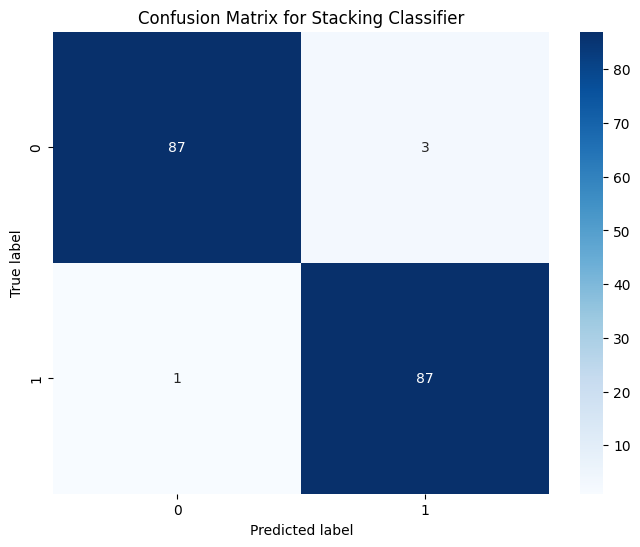

In [248]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Stacking Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [249]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Stacked Classifier',
    type='Traditional',
    epoch=str("-"),
    batch_size=str("-"),
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# Gradient Boosting Machines (GBM)

In [250]:
# Data Preparation
X = pre_pseu_iso.iloc[:, 2:21].values  # feature columns
y = pre_pseu_iso['presence'].values  # target column

# Splitting data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting into 70% training and 30% temporary
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splitting temporary into 50% validation and 50% test

# Data normalization - fit the scaler only on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize the Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Predict on test set
y_pred_test = model.predict(X_test)
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

# Evaluation on Validation Set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Accuracy       :", accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)


Validation Accuracy : 0.9044943820224719
Validation Precision: 0.9125
Validation Recall   : 0.8795180722891566
Validation F1 Score : 0.8957055214723926
Validation AUC      : 0.9514267596702599
Test Accuracy       : 0.9213483146067416
Test Precision      : 0.9111111111111111
Test Recall         : 0.9318181818181818
Test F1 Score       : 0.9213483146067416
Test AUC            : 0.9768308080808081


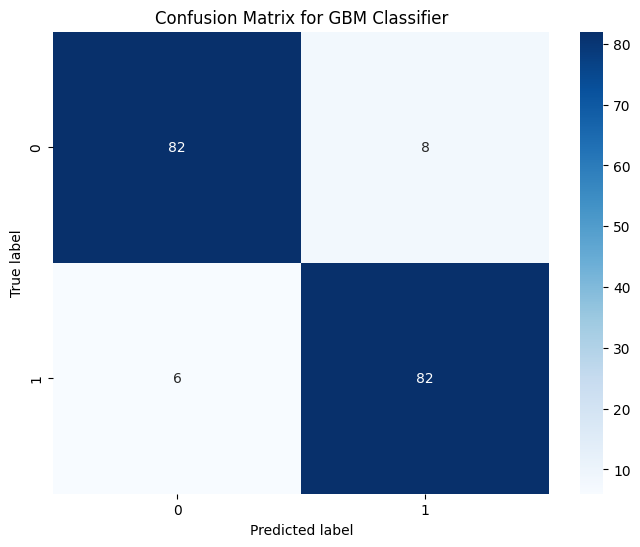

In [251]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for GBM Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [252]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Gradient Boosting',
    type='Traditional',
    epoch=str("-"),
    batch_size=str("-"),
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# XGBoost Classifier

In [253]:
# Data Preparation
X = pre_pseu_iso.iloc[:, 2:21].values  # feature columns
y = pre_pseu_iso['presence'].values  # target column

# Splitting data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting into 70% training and 30% temporary
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splitting temporary into 50% validation and 50% test

# Data normalization - fit the scaler only on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize the  XGBoost
xgboost_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on validation set
y_pred_val = xgboost_model.predict(X_val)
y_pred_proba_val = xgboost_model.predict_proba(X_val)[:, 1]

# Predict on test set
y_pred_test = xgboost_model.predict(X_test)
y_pred_proba_test = xgboost_model.predict_proba(X_test)[:, 1]

# Evaluation on Validation Set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Accuracy       :", accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)


Validation Accuracy : 0.9325842696629213
Validation Precision: 0.9493670886075949
Validation Recall   : 0.9036144578313253
Validation F1 Score : 0.9259259259259259
Validation AUC      : 0.9872542802790109
Test Accuracy       : 0.9775280898876404
Test Precision      : 0.9666666666666667
Test Recall         : 0.9886363636363636
Test F1 Score       : 0.9775280898876404
Test AUC            : 0.9953282828282828


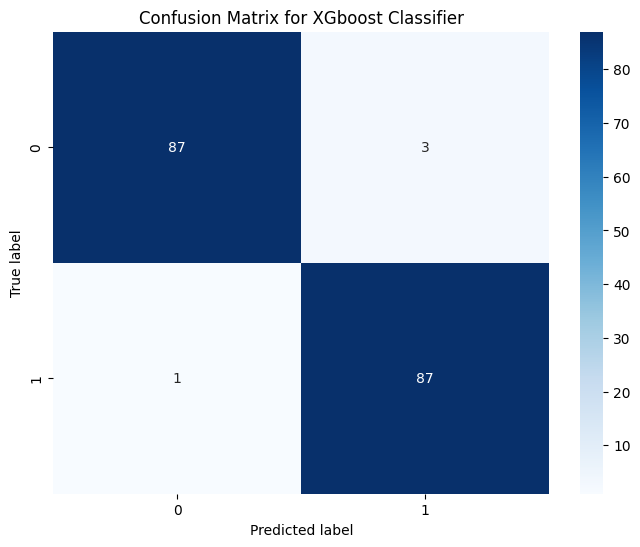

In [254]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGboost Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [255]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='XGBoost',
    type='Traditional',
    epoch=str("-"),
    batch_size=str("-"),
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# Bagging RandomForest

In [256]:
# Data Preparation
X = pre_pseu_iso.iloc[:, 2:21].values  # feature columns
y = pre_pseu_iso['presence'].values  # target column

# Splitting data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting into 70% training and 30% temporary
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splitting temporary into 50% validation and 50% test

# Data normalization - fit the scaler only on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize the Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on validation set
y_pred_val = random_forest.predict(X_val)
y_pred_proba_val = random_forest.predict_proba(X_val)[:, 1]

# Predict on test set
y_pred_test = random_forest.predict(X_test)
y_pred_proba_test = random_forest.predict_proba(X_test)[:, 1]

# Evaluation on Validation Set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Accuracy       :", accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)


Validation Accuracy : 0.9550561797752809
Validation Precision: 0.9629629629629629
Validation Recall   : 0.9397590361445783
Validation F1 Score : 0.9512195121951219
Validation AUC      : 0.9878249841471148
Test Accuracy       : 0.9662921348314607
Test Precision      : 0.9659090909090909
Test Recall         : 0.9659090909090909
Test F1 Score       : 0.9659090909090909
Test AUC            : 0.995770202020202


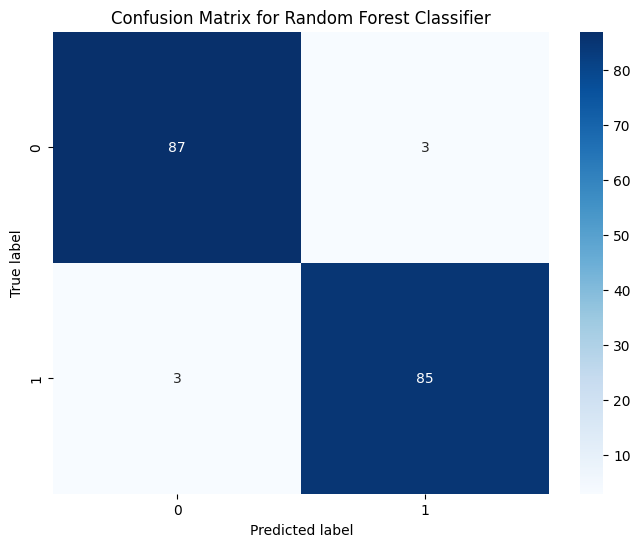

In [257]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [258]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Random Forest',
    type='Traditional',
    epoch=str("-"),
    batch_size=str("-"),
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

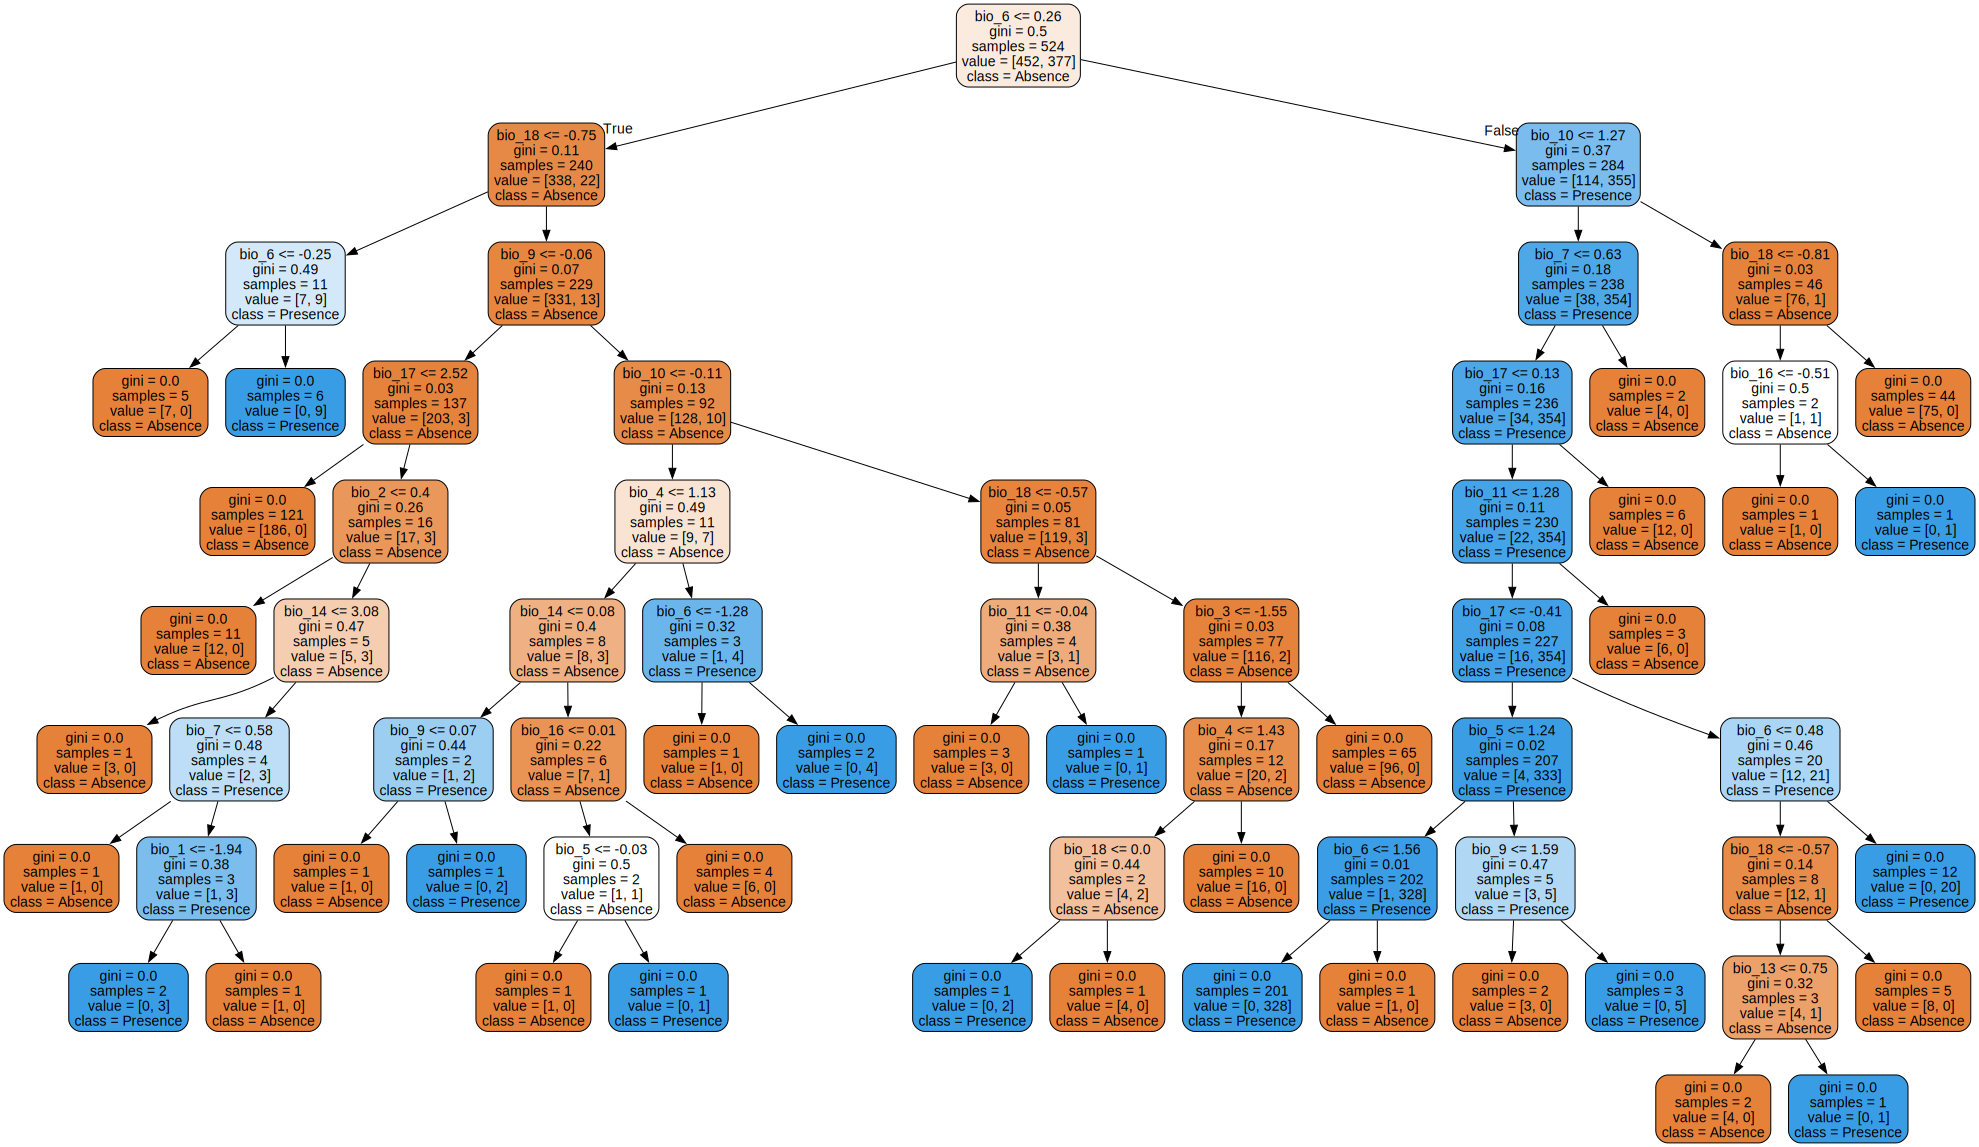

In [259]:
# Extract a single tree
single_tree = random_forest.estimators_[0]

# Export as dot file
export_graphviz(single_tree, out_file='tree.dot', 
                feature_names = pre_pseu_iso.columns[2:21],
                class_names = ['Absence', 'Presence'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Use dot file to create a graph
with open('tree.dot') as f:
    dot_graph = f.read()

# Display the graph
graphviz.Source(dot_graph)


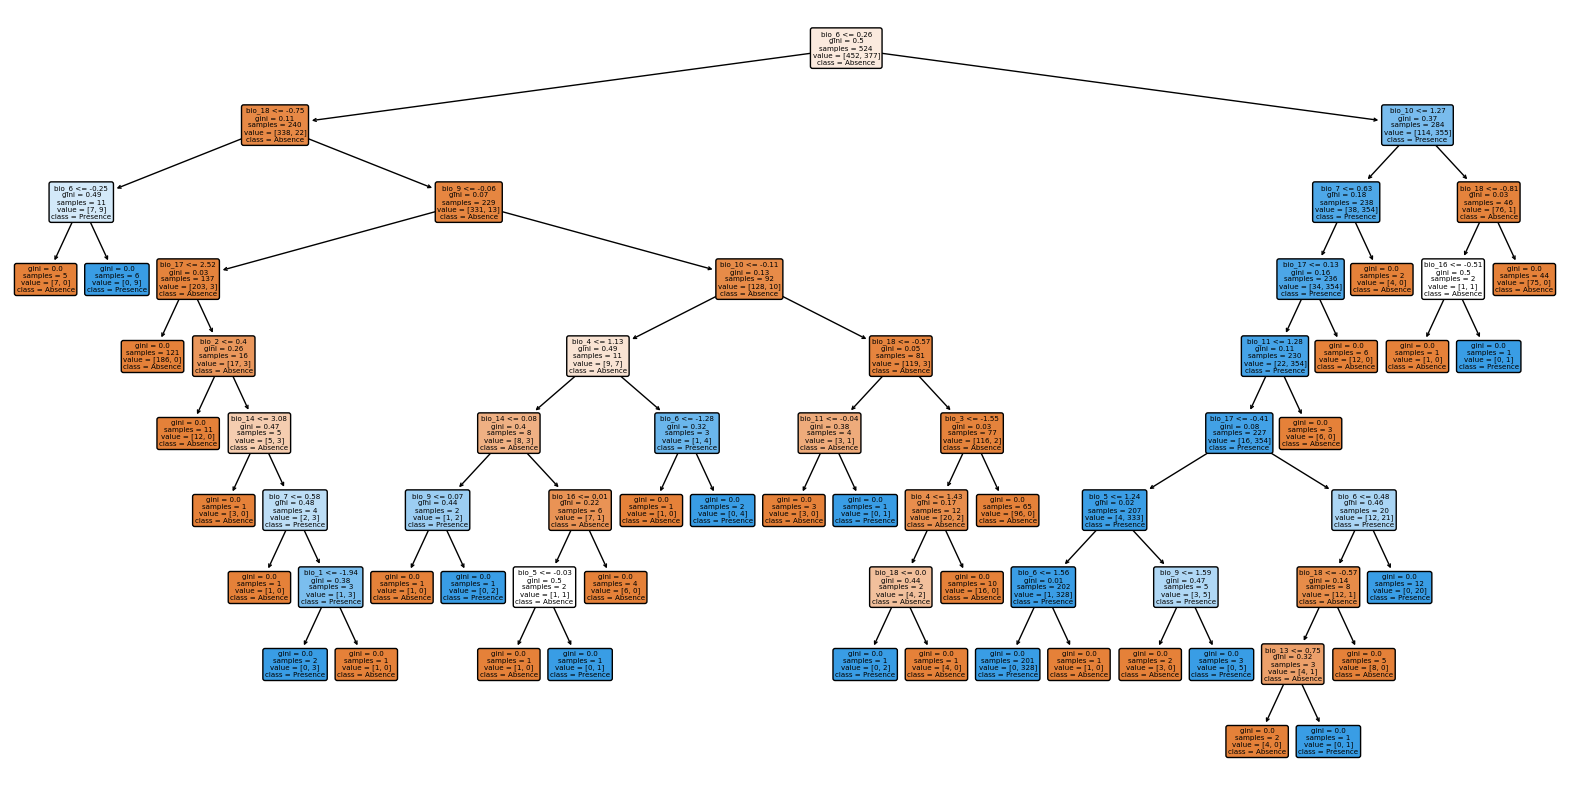

In [260]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(single_tree, 
          feature_names=pre_pseu_iso.columns[2:21], 
          class_names=['Absence', 'Presence'], 
          filled=True, rounded=True, 
          precision=2)
plt.show()


In [261]:
model_metrics

,Model Name,Type,Epoch,Batch Size,Validation Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Validation AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC
0,Stacked Classifier,Traditional,-,-,0.932584,0.927711,0.927711,0.927711,0.973494,0.977528,0.966667,0.988636,0.977528,0.986995
1,Gradient Boosting,Traditional,-,-,0.904494,0.912500,0.879518,0.895706,0.951427,0.921348,0.911111,0.931818,0.921348,0.976831
2,XGBoost,Traditional,-,-,0.932584,0.949367,0.903614,0.925926,0.987254,0.977528,0.966667,0.988636,0.977528,0.995328
3,Random Forest,Traditional,-,-,0.955056,0.962963,0.939759,0.951220,0.987825,0.966292,0.965909,0.965909,0.965909,0.995770


# `Deep Learning Networks`

# Keras Sequential

In [262]:
# Data Preparation
X = pre_pseu_iso.iloc[:, 2:21].values  # feature columns
y = pre_pseu_iso['presence'].values  # target column

# Splitting data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting into 70% training and 30% temporary
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Splitting temporary into 50% validation and 50% test

# Data normalization - fit the scaler only on the training data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [263]:
# Build the model
model_ks = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_ks.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [264]:
print(X_train.shape, X_val.shape, X_test.shape)
print('\n')
print(y_train.shape, y_val.shape, y_test.shape)

(829, 19) (178, 19) (178, 19)


(829,) (178,) (178,)


In [265]:
# Train the model using training and validation sets
history = model_ks.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
26/26 [==============================] - 4s 80ms/step - loss: 0.6703 - accuracy: 0.6164 - val_loss: 0.5312 - val_accuracy: 0.8202
Epoch 2/20
26/26 [==============================] - 1s 35ms/step - loss: 0.4602 - accuracy: 0.8191 - val_loss: 0.4363 - val_accuracy: 0.8539
Epoch 3/20
26/26 [==============================] - 0s 16ms/step - loss: 0.3636 - accuracy: 0.8745 - val_loss: 0.3847 - val_accuracy: 0.8708
Epoch 4/20
26/26 [==============================] - 0s 14ms/step - loss: 0.3272 - accuracy: 0.8926 - val_loss: 0.3666 - val_accuracy: 0.8989
Epoch 5/20
26/26 [==============================] - 0s 9ms/step - loss: 0.3087 - accuracy: 0.8914 - val_loss: 0.3582 - val_accuracy: 0.9101
Epoch 6/20
26/26 [==============================] - 0s 10ms/step - loss: 0.2879 - accuracy: 0.9204 - val_loss: 0.3601 - val_accuracy: 0.8820
Epoch 7/20
26/26 [==============================] - 0s 8ms/step - loss: 0.2871 - accuracy: 0.9204 - val_loss: 0.3550 - val_accuracy: 0.8989
Epoch 8/20
26/2

In [266]:

# Evaluate the model on the test data
test_loss, test_acc = model_ks.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict on validation set
y_pred_proba_val = model_ks.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model_ks.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

accuracy_test=test_acc

1/6 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.9375

6/6 [==============================] - 0s 24ms/step - loss: 0.2251 - accuracy: 0.9551
Test accuracy: 0.9550561904907227
6/6 [==============================] - 0s 8ms/step
Validation Accuracy: 0.9044943820224719
Validation Precision: 0.8586956521739131
Validation Recall   : 0.9518072289156626
Validation F1 Score : 0.9028571428571429
Validation AUC      : 0.9429296131896003
Test Precision      : 0.925531914893617
Test Recall         : 0.9886363636363636
Test F1 Score       : 0.9560439560439561
Test AUC            : 0.9619949494949495


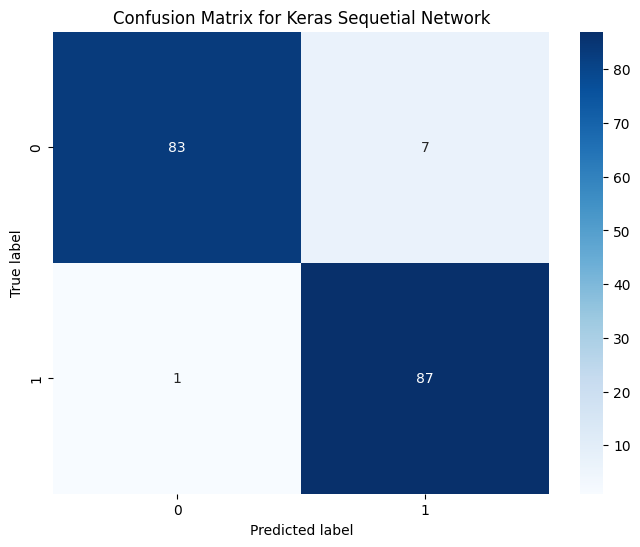

In [267]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Keras Sequetial Network')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [268]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Neural Network',
    type='Deep Learning',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# Multi Layer Perceptron

In [269]:
model_enhanced_mlp = Sequential()
model_enhanced_mlp.add(Dense(128, input_shape=(X_train.shape[1],)))
model_enhanced_mlp.add(BatchNormalization())
model_enhanced_mlp.add(Activation('relu'))
model_enhanced_mlp.add(Dropout(0.5))
model_enhanced_mlp.add(Dense(64))
model_enhanced_mlp.add(BatchNormalization())
model_enhanced_mlp.add(Activation('relu'))
model_enhanced_mlp.add(Dropout(0.5))
model_enhanced_mlp.add(Dense(1, activation='sigmoid'))

model_enhanced_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [270]:
# Train the model using training and validation sets
history = model_enhanced_mlp.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
26/26 [==============================] - 4s 86ms/step - loss: 0.4889 - accuracy: 0.7648 - val_loss: 0.6400 - val_accuracy: 0.8708
Epoch 2/20
26/26 [==============================] - 0s 19ms/step - loss: 0.2842 - accuracy: 0.8938 - val_loss: 0.5976 - val_accuracy: 0.7584
Epoch 3/20
26/26 [==============================] - 0s 15ms/step - loss: 0.2522 - accuracy: 0.9131 - val_loss: 0.5755 - val_accuracy: 0.7079
Epoch 4/20
26/26 [==============================] - 0s 14ms/step - loss: 0.2234 - accuracy: 0.9252 - val_loss: 0.5564 - val_accuracy: 0.7247
Epoch 5/20
26/26 [==============================] - 0s 14ms/step - loss: 0.2248 - accuracy: 0.9276 - val_loss: 0.5296 - val_accuracy: 0.7360
Epoch 6/20
26/26 [==============================] - 0s 13ms/step - loss: 0.2112 - accuracy: 0.9312 - val_loss: 0.4984 - val_accuracy: 0.7865
Epoch 7/20
26/26 [==============================] - 0s 16ms/step - loss: 0.1909 - accuracy: 0.9421 - val_loss: 0.4653 - val_accuracy: 0.7921
Epoch 8/20
26

In [271]:

# Evaluate the model on the test data
test_loss, test_acc = model_enhanced_mlp.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict on validation set
y_pred_proba_val = model_enhanced_mlp.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model_enhanced_mlp.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

accuracy_test=test_acc

1/6 [====>.........................] - ETA: 0s - loss: 0.1056 - accuracy: 0.9688

6/6 [==============================] - 0s 7ms/step - loss: 0.1434 - accuracy: 0.9775
Test accuracy: 0.9775280952453613
6/6 [==============================] - 0s 3ms/step
Validation Accuracy: 0.9382022471910112
Validation Precision: 0.9186046511627907
Validation Recall   : 0.9518072289156626
Validation F1 Score : 0.9349112426035502
Validation AUC      : 0.9736207989854153
Test Precision      : 0.9666666666666667
Test Recall         : 0.9886363636363636
Test F1 Score       : 0.9775280898876404
Test AUC            : 0.9830808080808081


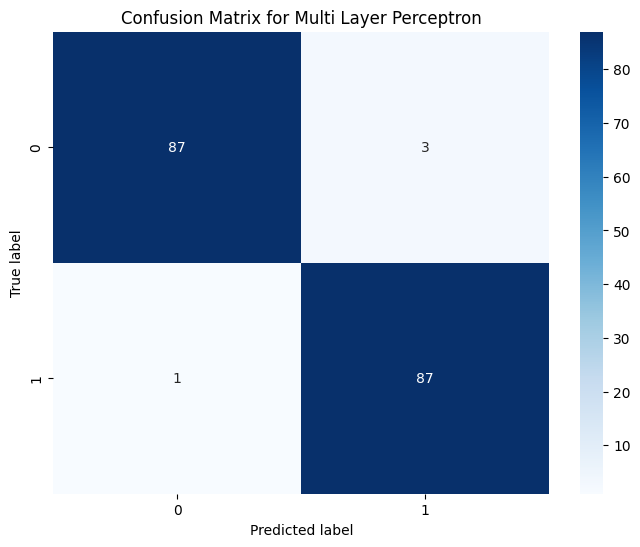

In [272]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Multi Layer Perceptron')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [273]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Multi Layer Perceptron',
    type='Deep Learning',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# Autoencoder

In [274]:
# Define encoder
input_data = Input(shape=(X_train.shape[1],))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dense(32, activation='relu')(encoded)

# Define decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_data, decoded)

# Encoder - for dimensionality reduction
encoder = Model(input_data, encoded)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# You might train the autoencoder here and use the encoder to transform the data

# Now, use the encoded layer's output as features for classification
encoded_input = Input(shape=(X_train.shape[1],))
classifier_layer = Dense(1, activation='sigmoid')(encoded_input)
classifier = Model(encoded_input, classifier_layer)

# Use the encoder to get the reduced dimensionality for X_train
# e.g., X_train_encoded = encoder.predict(X_train)

# Then, compile and train the classifier model normally using the encoded inputs
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [275]:
# Train the model using training and validation sets
history = classifier.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
26/26 [==============================] - 1s 32ms/step - loss: 0.7939 - accuracy: 0.5549 - val_loss: 0.8016 - val_accuracy: 0.5337
Epoch 2/20
26/26 [==============================] - 0s 10ms/step - loss: 0.7526 - accuracy: 0.5549 - val_loss: 0.7597 - val_accuracy: 0.5337
Epoch 3/20
26/26 [==============================] - 0s 7ms/step - loss: 0.7175 - accuracy: 0.5549 - val_loss: 0.7285 - val_accuracy: 0.5337
Epoch 4/20
26/26 [==============================] - 0s 11ms/step - loss: 0.6910 - accuracy: 0.5549 - val_loss: 0.7031 - val_accuracy: 0.5281
Epoch 5/20
26/26 [==============================] - 0s 7ms/step - loss: 0.6708 - accuracy: 0.5633 - val_loss: 0.6820 - val_accuracy: 0.5281
Epoch 6/20
26/26 [==============================] - 0s 7ms/step - loss: 0.6532 - accuracy: 0.5706 - val_loss: 0.6668 - val_accuracy: 0.5337
Epoch 7/20
26/26 [==============================] - 0s 8ms/step - loss: 0.6392 - accuracy: 0.5899 - val_loss: 0.6535 - val_accuracy: 0.5787
Epoch 8/20
26/26 

In [276]:

# Evaluate the model on the test data
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict on validation set
y_pred_proba_val = classifier.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = classifier.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

accuracy_test=test_acc

6/6 [==============================] - 0s 6ms/step - loss: 0.5220 - accuracy: 0.8146
Test accuracy: 0.8146067261695862
6/6 [==============================] - 0s 1ms/step
Validation Accuracy: 0.7808988764044944
Validation Precision: 0.8793103448275862
Validation Recall   : 0.6144578313253012
Validation F1 Score : 0.7234042553191489
Validation AUC      : 0.9013316423589094
Test Precision      : 0.9104477611940298
Test Recall         : 0.6931818181818182
Test F1 Score       : 0.7870967741935485
Test AUC            : 0.939141414141414


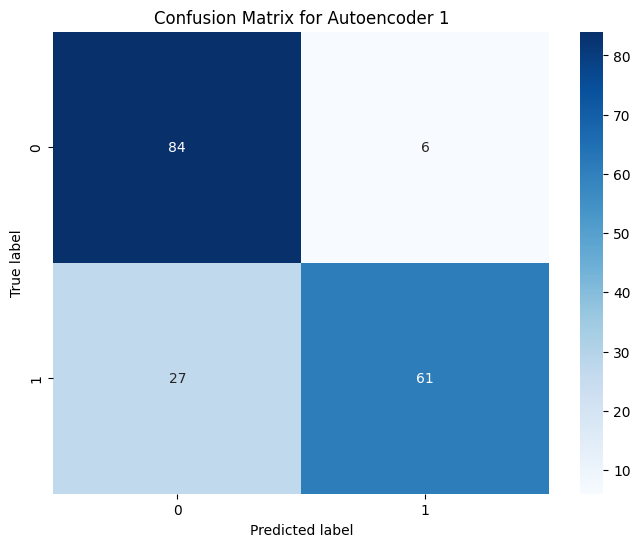

In [277]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Autoencoder 1')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [278]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Autoencoder',
    type='Deep Learning',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

In [279]:
model_metrics

,Model Name,Type,Epoch,Batch Size,Validation Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Validation AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC
0,Stacked Classifier,Traditional,-,-,0.932584,0.927711,0.927711,0.927711,0.973494,0.977528,0.966667,0.988636,0.977528,0.986995
1,Gradient Boosting,Traditional,-,-,0.904494,0.912500,0.879518,0.895706,0.951427,0.921348,0.911111,0.931818,0.921348,0.976831
2,XGBoost,Traditional,-,-,0.932584,0.949367,0.903614,0.925926,0.987254,0.977528,0.966667,0.988636,0.977528,0.995328
3,Random Forest,Traditional,-,-,0.955056,0.962963,0.939759,0.951220,0.987825,0.966292,0.965909,0.965909,0.965909,0.995770
4,Neural Network,Deep Learning,20,32,0.904494,0.858696,0.951807,0.902857,0.942930,0.955056,0.925532,0.988636,0.956044,0.961995
5,Multi Layer Perceptron,Deep Learning,20,32,0.938202,0.918605,0.951807,0.934911,0.973621,0.977528,0.966667,0.988636,0.977528,0.983081
6,Autoencoder,Deep Learning,20,32,0.780899,0.879310,0.614458,0.723404,0.901332,0.814607,0.910448,0.693182,0.787097,0.939141


#  Autoencoder 2

In [280]:
# Define encoder
input_data = Input(shape=(X_train.shape[1],))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dense(32, activation='relu')(encoded)

# Define decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_data, decoded)

# Encoder - for dimensionality reduction
encoder = Model(input_data, encoded)

# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_val, X_val))

# Use the encoder to transform the data
X_train_encoded = encoder.predict(X_train)
X_val_encoded = encoder.predict(X_val)
X_test_encoded = encoder.predict(X_test)

# Define classifier with the encoded data shape
encoded_input = Input(shape=(32,))
classifier_layer = Dense(1, activation='sigmoid')(encoded_input)
classifier = Model(encoded_input, classifier_layer)

# Compile and train the classifier using the encoded data
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Epoch 1/20
26/26 [==============================] - 2s 38ms/step - loss: 0.6514 - val_loss: 0.6022
Epoch 2/20
26/26 [==============================] - 0s 15ms/step - loss: 0.5729 - val_loss: 0.5623
Epoch 3/20
26/26 [==============================] - 0s 9ms/step - loss: 0.5402 - val_loss: 0.5344
Epoch 4/20
26/26 [==============================] - 0s 9ms/step - loss: 0.5220 - val_loss: 0.5243
Epoch 5/20
26/26 [==============================] - 0s 14ms/step - loss: 0.5169 - val_loss: 0.5213
Epoch 6/20
26/26 [==============================] - 0s 7ms/step - loss: 0.5148 - val_loss: 0.5197
Epoch 7/20
26/26 [==============================] - 0s 10ms/step - loss: 0.5129 - val_loss: 0.5175
Epoch 8/20
26/26 [==============================] - 0s 7ms/step - loss: 0.5108 - val_loss: 0.5156
Epoch 9/20
26/26 [==============================] - 0s 8ms/step - loss: 0.5090 - val_loss: 0.5138
Epoch 10/20
26/26 [==============================] - 0s 7ms/step - loss: 0.5076 - val_loss: 0.5127
Epoch 11/20
26/

In [281]:
history = classifier.fit(X_train_encoded, y_train, epochs=20, batch_size=32, validation_data=(X_val_encoded, y_val))

Epoch 1/20


26/26 [==============================] - 1s 33ms/step - loss: 0.7685 - accuracy: 0.5392 - val_loss: 0.7194 - val_accuracy: 0.4944
Epoch 2/20
26/26 [==============================] - 0s 9ms/step - loss: 0.6431 - accuracy: 0.5042 - val_loss: 0.6374 - val_accuracy: 0.5281
Epoch 3/20
26/26 [==============================] - 0s 8ms/step - loss: 0.5715 - accuracy: 0.6996 - val_loss: 0.5888 - val_accuracy: 0.6910
Epoch 4/20
26/26 [==============================] - 0s 9ms/step - loss: 0.5209 - accuracy: 0.7660 - val_loss: 0.5515 - val_accuracy: 0.7079
Epoch 5/20
26/26 [==============================] - 0s 10ms/step - loss: 0.4820 - accuracy: 0.8070 - val_loss: 0.5198 - val_accuracy: 0.8034
Epoch 6/20
26/26 [==============================] - 0s 7ms/step - loss: 0.4507 - accuracy: 0.8601 - val_loss: 0.4947 - val_accuracy: 0.8258
Epoch 7/20
26/26 [==============================] - 0s 8ms/step - loss: 0.4248 - accuracy: 0.8745 - val_loss: 0.4735 - val_accuracy: 0.8427
Epoch 8/20
26/26 [===========

In [282]:
# Evaluate the model on the test data
test_loss, test_acc = classifier.evaluate(X_test_encoded, y_test)
print('Test accuracy:', test_acc)

# Predict on validation set with encoded data
y_pred_proba_val = classifier.predict(X_val_encoded)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set with encoded data
y_pred_proba_test = classifier.predict(X_test_encoded)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

accuracy_test = test_acc

1/6 [====>.........................] - ETA: 0s - loss: 0.3459 - accuracy: 0.9375

6/6 [==============================] - 0s 6ms/step - loss: 0.2793 - accuracy: 0.9326
Test accuracy: 0.932584285736084
6/6 [==============================] - 0s 2ms/step
Validation Accuracy: 0.8932584269662921
Validation Precision: 0.8404255319148937
Validation Recall   : 0.9518072289156626
Validation F1 Score : 0.8926553672316384
Validation AUC      : 0.9454660748256183
Test Precision      : 0.8877551020408163
Test Recall         : 0.9886363636363636
Test F1 Score       : 0.935483870967742
Test AUC            : 0.9685606060606061


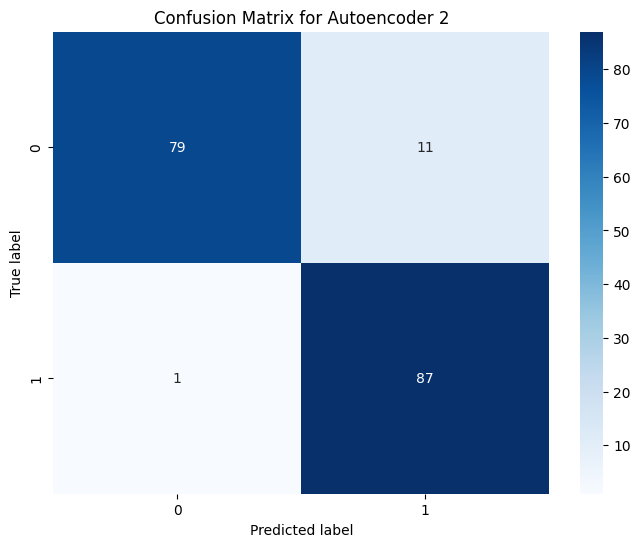

In [283]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Autoencoder 2')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [284]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Autoencoder 2',
    type='Deep Learning',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# Deep Belief Network (DBN)

In [285]:
# Constructing a DBN
def build_dbn_model(input_shape):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

dbn_model = build_dbn_model((X_train.shape[1],))
dbn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 256)               5120      
                                                                 
 dense_88 (Dense)            (None, 128)               32896     
                                                                 
 dense_89 (Dense)            (None, 64)                8256      
                                                                 
 dense_90 (Dense)            (None, 1)                 65        
                                                                 
Total params: 46337 (181.00 KB)
Trainable params: 46337 (181.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [286]:
# Train and evaluate the model as usual
history = dbn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
26/26 [==============================] - 2s 40ms/step - loss: 0.4689 - accuracy: 0.8203 - val_loss: 0.3819 - val_accuracy: 0.8989
Epoch 2/20
26/26 [==============================] - 0s 13ms/step - loss: 0.3163 - accuracy: 0.8938 - val_loss: 0.3915 - val_accuracy: 0.8708
Epoch 3/20
26/26 [==============================] - 0s 9ms/step - loss: 0.2884 - accuracy: 0.9240 - val_loss: 0.3827 - val_accuracy: 0.8708
Epoch 4/20
26/26 [==============================] - 0s 12ms/step - loss: 0.2901 - accuracy: 0.9216 - val_loss: 0.3815 - val_accuracy: 0.8820
Epoch 5/20
26/26 [==============================] - 0s 10ms/step - loss: 0.2703 - accuracy: 0.9324 - val_loss: 0.3575 - val_accuracy: 0.9101
Epoch 6/20
26/26 [==============================] - 0s 8ms/step - loss: 0.2712 - accuracy: 0.9349 - val_loss: 0.3546 - val_accuracy: 0.9101
Epoch 7/20
26/26 [==============================] - 0s 9ms/step - loss: 0.2723 - accuracy: 0.9276 - val_loss: 0.3511 - val_accuracy: 0.9045
Epoch 8/20
26/26

In [287]:
# Evaluate the model on the test data
test_loss, test_acc = dbn_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict on validation set
y_pred_proba_val = dbn_model.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = dbn_model.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

accuracy_test=test_acc

6/6 [==============================] - 0s 7ms/step - loss: 0.4410 - accuracy: 0.8652
Test accuracy: 0.8651685118675232
6/6 [==============================] - 0s 2ms/step
Validation Accuracy: 0.8089887640449438
Validation Precision: 0.7207207207207207
Validation Recall   : 0.963855421686747
Validation F1 Score : 0.8247422680412371
Validation AUC      : 0.9346861128725428
Test Precision      : 0.7909090909090909
Test Recall         : 0.9886363636363636
Test F1 Score       : 0.8787878787878788
Test AUC            : 0.9501262626262627


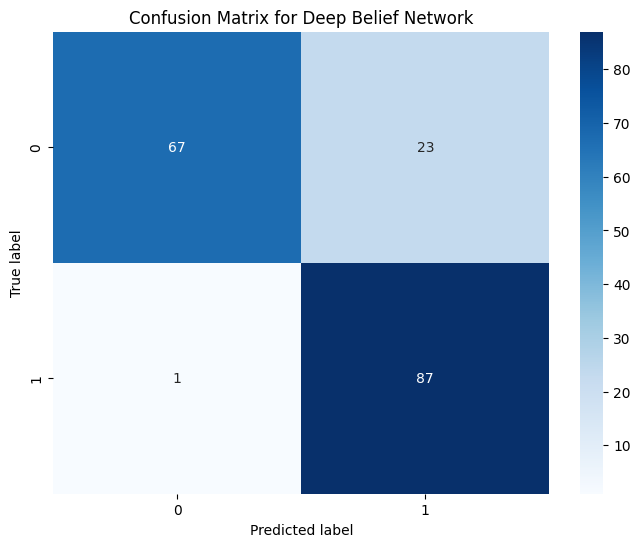

In [288]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Deep Belief Network')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [289]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Deep Belief Network',
    type='Deep Learning',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# Gated Recurrent Unit (GRU)

In [290]:
# Reshape data for GRU input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [291]:
# Build GRU model
def build_gru_model(input_shape):
    model = Sequential([
        GRU(50, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        GRU(50),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

gru_model = build_gru_model((1, X_train.shape[1]))
gru_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 1, 50)             10650     
                                                                 
 dropout_31 (Dropout)        (None, 1, 50)             0         
                                                                 
 gru_5 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_32 (Dropout)        (None, 50)                0         
                                                                 
 dense_91 (Dense)            (None, 1)                 51        
                                                                 
Total params: 26001 (101.57 KB)
Trainable params: 26001 (101.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [292]:
history = gru_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, 
                        validation_data=(X_val_reshaped, y_val))

Epoch 1/20
26/26 [==============================] - 4s 95ms/step - loss: 0.6447 - accuracy: 0.7021 - val_loss: 0.6160 - val_accuracy: 0.6966
Epoch 2/20
26/26 [==============================] - 1s 20ms/step - loss: 0.5436 - accuracy: 0.8215 - val_loss: 0.4897 - val_accuracy: 0.8820
Epoch 3/20
26/26 [==============================] - 1s 20ms/step - loss: 0.3953 - accuracy: 0.9059 - val_loss: 0.3841 - val_accuracy: 0.9157
Epoch 4/20
26/26 [==============================] - 1s 22ms/step - loss: 0.3097 - accuracy: 0.9131 - val_loss: 0.3490 - val_accuracy: 0.9101
Epoch 5/20
26/26 [==============================] - 0s 16ms/step - loss: 0.2866 - accuracy: 0.9119 - val_loss: 0.3389 - val_accuracy: 0.9270
Epoch 6/20
26/26 [==============================] - 0s 15ms/step - loss: 0.2715 - accuracy: 0.9192 - val_loss: 0.3317 - val_accuracy: 0.9213
Epoch 7/20
26/26 [==============================] - 0s 15ms/step - loss: 0.2714 - accuracy: 0.9264 - val_loss: 0.3268 - val_accuracy: 0.8989
Epoch 8/20
26

In [293]:

# Evaluate the model on the test data
test_loss, test_acc = gru_model.evaluate(X_test_reshaped, y_test)
print('Test accuracy:', test_acc)

# Predict on validation set
y_pred_proba_val = gru_model.predict(X_val_reshaped)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = gru_model.predict(X_test_reshaped)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

accuracy_test=test_acc

6/6 [==============================] - 0s 6ms/step - loss: 0.1812 - accuracy: 0.9494
Test accuracy: 0.949438214302063
6/6 [==============================] - 0s 4ms/step
Validation Accuracy: 0.9101123595505618
Validation Precision: 0.8681318681318682
Validation Recall   : 0.9518072289156626
Validation F1 Score : 0.9080459770114944
Validation AUC      : 0.9604311984781231
Test Precision      : 0.9247311827956989
Test Recall         : 0.9772727272727273
Test F1 Score       : 0.9502762430939227
Test AUC            : 0.9719696969696969


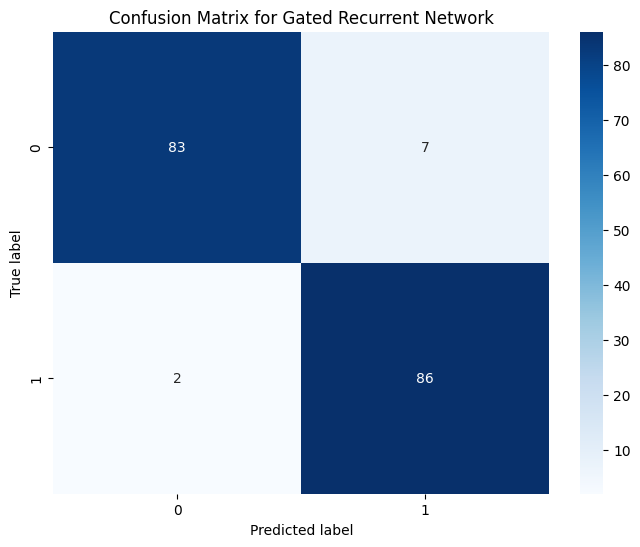

In [294]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gated Recurrent Network')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [295]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Gated Recurrent Network',
    type='Deep Learning',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# Transformer Model

In [296]:
# Reshape data for transformer input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [297]:
def build_transformer_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    attn_output = MultiHeadAttention(num_heads=2, key_dim=2)(inputs, inputs)
    attn_output = Dropout(0.1)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)
    out1 = Flatten()(out1)  # Flatten the output
    out2 = Dense(64, activation='relu')(out1)
    outputs = Dense(1, activation='sigmoid')(out2)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

transformer_model = build_transformer_model((1, X_train.shape[1]))
transformer_model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, 1, 19)]              0         []                            
                                                                                                  
 multi_head_attention_2 (Mu  (None, 1, 19)                335       ['input_23[0][0]',            
 ltiHeadAttention)                                                   'input_23[0][0]']            
                                                                                                  
 dropout_33 (Dropout)        (None, 1, 19)                0         ['multi_head_attention_2[0][0]
                                                                    ']                            
                                                                                           

In [298]:
history = transformer_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, 
                        validation_data=(X_val_reshaped, y_val))

Epoch 1/20
26/26 [==============================] - 3s 92ms/step - loss: 0.5339 - accuracy: 0.7527 - val_loss: 0.4811 - val_accuracy: 0.8202
Epoch 2/20
26/26 [==============================] - 1s 22ms/step - loss: 0.3900 - accuracy: 0.8902 - val_loss: 0.4109 - val_accuracy: 0.8652
Epoch 3/20
26/26 [==============================] - 1s 20ms/step - loss: 0.3300 - accuracy: 0.8878 - val_loss: 0.3543 - val_accuracy: 0.8876
Epoch 4/20
26/26 [==============================] - 0s 19ms/step - loss: 0.2954 - accuracy: 0.9107 - val_loss: 0.3320 - val_accuracy: 0.8764
Epoch 5/20
26/26 [==============================] - 0s 15ms/step - loss: 0.2765 - accuracy: 0.9240 - val_loss: 0.3094 - val_accuracy: 0.9045
Epoch 6/20
26/26 [==============================] - 0s 16ms/step - loss: 0.2589 - accuracy: 0.9264 - val_loss: 0.3005 - val_accuracy: 0.9101
Epoch 7/20
26/26 [==============================] - 0s 17ms/step - loss: 0.2395 - accuracy: 0.9324 - val_loss: 0.2850 - val_accuracy: 0.9101
Epoch 8/20
26

In [299]:

# Evaluate the model on the test data
test_loss, test_acc = transformer_model.evaluate(X_test_reshaped, y_test)
print('Test accuracy:', test_acc)

# Predict on validation set
y_pred_proba_val = transformer_model.predict(X_val_reshaped)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = transformer_model.predict(X_test_reshaped)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)

accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

accuracy_test=test_acc

6/6 [==============================] - 0s 23ms/step - loss: 0.1405 - accuracy: 0.9607
Test accuracy: 0.9606741666793823
6/6 [==============================] - 0s 9ms/step
Validation Accuracy: 0.9213483146067416
Validation Precision: 0.896551724137931
Validation Recall   : 0.9397590361445783
Validation F1 Score : 0.9176470588235294
Validation AUC      : 0.9576410906785034
Test Precision      : 0.9354838709677419
Test Recall         : 0.9886363636363636
Test F1 Score       : 0.9613259668508287
Test AUC            : 0.9823232323232323


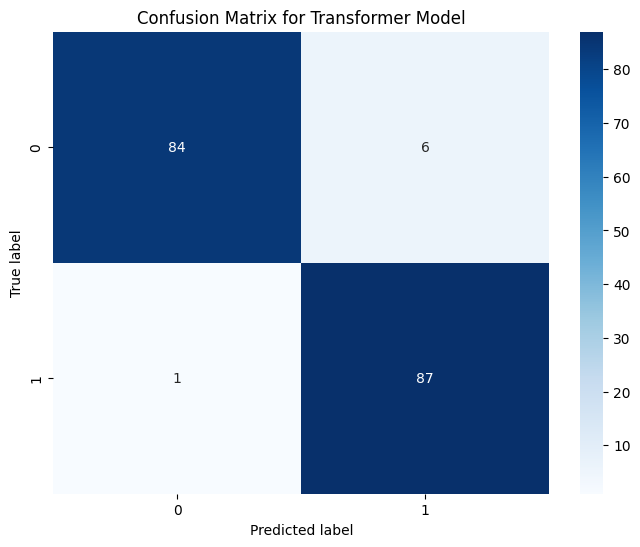

In [300]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Transformer Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [301]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Transformer Network',
    type='Deep Learning',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# `Convolutional Neural Networks`

## **Normalize & Split Preventing Leakage**

In [302]:
# Split data into training and other sets first
X = np.vstack((x1, x2))
y = np.concatenate((y1, y2))

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the training set. Fit the scaler on X_train only
scaler = StandardScaler()
X_train_reshaped = X_train.reshape(-1, 19)  # Reshape to 2D array for scaling
scaler.fit(X_train_reshaped)  # Fit on the training data only

# Transform the training data
X_train_scaled = scaler.transform(X_train_reshaped)
X_train_scaled = X_train_scaled.reshape(X_train.shape)

# Transform the validation and test sets based on the scaler fitted on the training data
X_val_reshaped = X_val.reshape(-1, 19)
X_val_scaled = scaler.transform(X_val_reshaped)
X_val_scaled = X_val_scaled.reshape(X_val.shape)

X_test_reshaped = X_test.reshape(-1, 19)
X_test_scaled = scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

# Resize the images after scaling, if needed
X_train_resized = resize(X_train_scaled, (X_train_scaled.shape[0], 32, 32, 19))
X_val_resized = resize(X_val_scaled, (X_val_scaled.shape[0], 32, 32, 19))
X_test_resized = resize(X_test_scaled, (X_test_scaled.shape[0], 32, 32, 19))

# Your final variables for model training and evaluation
print(X_train_resized.shape, X_val_resized.shape, X_test_resized.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(786, 32, 32, 19) (168, 32, 32, 19) (169, 32, 32, 19)
(786,) (168,) (169,)


In [303]:
X_train = X_train_resized
X_val = X_val_resized
X_test = X_test_resized

# LeNet-5 inspired model

In [304]:
model_lenet = Sequential()
model_lenet.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 19)))
model_lenet.add(MaxPooling2D(pool_size=(2, 2)))
model_lenet.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_lenet.add(MaxPooling2D(pool_size=(2, 2)))
model_lenet.add(Flatten())
model_lenet.add(Dense(120, activation='relu'))
model_lenet.add(Dense(84, activation='relu'))
model_lenet.add(Dense(1, activation='sigmoid'))

model_lenet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lenet.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 28, 28, 6)         2856      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 400)               0         
                                                                 
 dense_94 (Dense)            (None, 120)             

In [305]:
history=model_lenet.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 2s 53ms/step - loss: 0.5505 - accuracy: 0.7316 - val_loss: 0.6309 - val_accuracy: 0.7083
Epoch 2/20
25/25 [==============================] - 1s 25ms/step - loss: 0.5416 - accuracy: 0.7888 - val_loss: 0.6261 - val_accuracy: 0.7202
Epoch 3/20
25/25 [==============================] - 0s 15ms/step - loss: 0.5009 - accuracy: 0.8079 - val_loss: 0.5924 - val_accuracy: 0.7262
Epoch 4/20
25/25 [==============================] - 0s 14ms/step - loss: 0.4858 - accuracy: 0.8104 - val_loss: 0.6328 - val_accuracy: 0.7321
Epoch 5/20
25/25 [==============================] - 0s 14ms/step - loss: 0.4969 - accuracy: 0.8155 - val_loss: 0.6158 - val_accuracy: 0.7560
Epoch 6/20
25/25 [==============================] - 0s 13ms/step - loss: 0.4938 - accuracy: 0.8244 - val_loss: 0.5655 - val_accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 0s 13ms/step - loss: 0.4734 - accuracy: 0.8142 - val_loss: 0.6964 - val_accuracy: 0.7500
Epoch 8/20
25

In [306]:
# Evaluate the model_lenet on the test data
test_loss, test_acc = model_lenet.evaluate(X_test, y_test)

# Predict on validation set
y_pred_proba_val = model_lenet.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model_lenet.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test=test_acc
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Test accuracy       :', accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

6/6 [==============================] - 0s 14ms/step
Validation Accuracy : 0.7559523809523809
Validation Precision: 0.8
Validation Recall   : 0.6746987951807228
Validation F1 Score : 0.7320261437908497
Validation AUC      : 0.864351523742027
Test accuracy       : 0.7869822382926941
Test Precision      : 0.8428571428571429
Test Recall         : 0.7023809523809523
Test F1 Score       : 0.7662337662337663
Test AUC            : 0.89187675070028


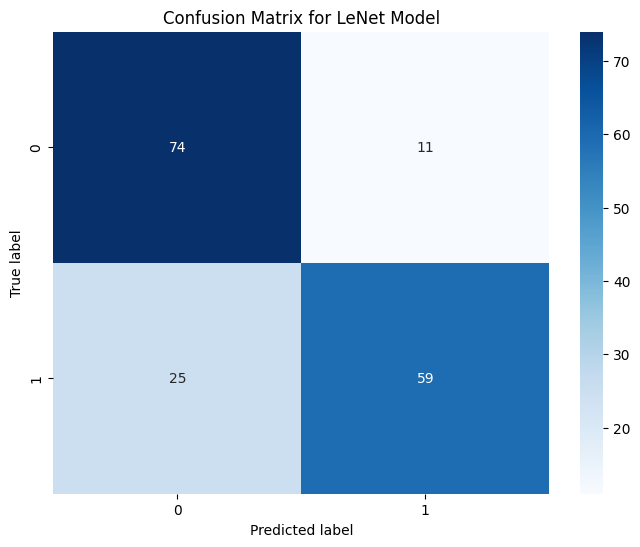

In [307]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LeNet Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [308]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='LeNet',
    type='Convolutional',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

In [309]:
model_metrics

,Model Name,Type,Epoch,Batch Size,Validation Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Validation AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC
0,Stacked Classifier,Traditional,-,-,0.932584,0.927711,0.927711,0.927711,0.973494,0.977528,0.966667,0.988636,0.977528,0.986995
1,Gradient Boosting,Traditional,-,-,0.904494,0.912500,0.879518,0.895706,0.951427,0.921348,0.911111,0.931818,0.921348,0.976831
2,XGBoost,Traditional,-,-,0.932584,0.949367,0.903614,0.925926,0.987254,0.977528,0.966667,0.988636,0.977528,0.995328
3,Random Forest,Traditional,-,-,0.955056,0.962963,0.939759,0.951220,0.987825,0.966292,0.965909,0.965909,0.965909,0.995770
4,Neural Network,Deep Learning,20,32,0.904494,0.858696,0.951807,0.902857,0.942930,0.955056,0.925532,0.988636,0.956044,0.961995
5,Multi Layer Perceptron,Deep Learning,20,32,0.938202,0.918605,0.951807,0.934911,0.973621,0.977528,0.966667,0.988636,0.977528,0.983081
6,Autoencoder,Deep Learning,20,32,0.780899,0.879310,0.614458,0.723404,0.901332,0.814607,0.910448,0.693182,0.787097,0.939141
7,Autoencoder 2,Deep Learning,20,32,0.893258,0.840426,0.951807,0.892655,0.945466,0.932584,0.887755,0.988636,0.935484,0.968561
8,Deep Belief Network,Deep Learning,20,32,0.808989,0.720721,0.963855,0.824742,0.934686,0.865169,0.790909,0.988636,0.878788,0.950126
9,Gated Recurrent Network,Deep Learning,20,32,0.910112,0.868132,0.951807,0.908046,0.960431,0.949438,0.924731,0.977273,0.950276,0.971970


# VGG inspired model

In [310]:
model_vgg = Sequential()

# Block 1
model_vgg.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 19), padding='same'))
model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# Classification block
model_vgg.add(Flatten())
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(1, activation='sigmoid'))

model_vgg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_vgg.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        11008     
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 8, 8, 128)         0         
 ng2D)                                               

In [311]:
history=model_vgg.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 4s 125ms/step - loss: 0.6514 - accuracy: 0.6845 - val_loss: 0.8635 - val_accuracy: 0.7024
Epoch 2/20
25/25 [==============================] - 1s 47ms/step - loss: 0.5652 - accuracy: 0.8041 - val_loss: 0.5661 - val_accuracy: 0.7262
Epoch 3/20
25/25 [==============================] - 1s 30ms/step - loss: 0.4989 - accuracy: 0.8193 - val_loss: 0.6271 - val_accuracy: 0.7500
Epoch 4/20
25/25 [==============================] - 1s 32ms/step - loss: 0.4879 - accuracy: 0.8142 - val_loss: 0.5139 - val_accuracy: 0.7560
Epoch 5/20
25/25 [==============================] - 1s 32ms/step - loss: 0.4655 - accuracy: 0.8181 - val_loss: 0.5391 - val_accuracy: 0.7560
Epoch 6/20
25/25 [==============================] - 1s 31ms/step - loss: 0.4613 - accuracy: 0.8232 - val_loss: 0.5382 - val_accuracy: 0.7560
Epoch 7/20
25/25 [==============================] - 1s 31ms/step - loss: 0.4663 - accuracy: 0.8206 - val_loss: 0.5873 - val_accuracy: 0.7560
Epoch 8/20
2

In [312]:

# Evaluate the model_vgg on the test data
test_loss, test_acc = model_vgg.evaluate(X_test, y_test)

# Predict on validation set
y_pred_proba_val = model_vgg.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model_vgg.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test=test_acc
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Test accuracy       :', accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)



6/6 [==============================] - 0s 22ms/step
Validation Accuracy : 0.7559523809523809
Validation Precision: 0.7916666666666666
Validation Recall   : 0.6867469879518072
Validation F1 Score : 0.7354838709677419
Validation AUC      : 0.751665485471297
Test accuracy       : 0.7928994297981262
Test Precision      : 0.855072463768116
Test Recall         : 0.7023809523809523
Test F1 Score       : 0.7712418300653594
Test AUC            : 0.7889355742296918


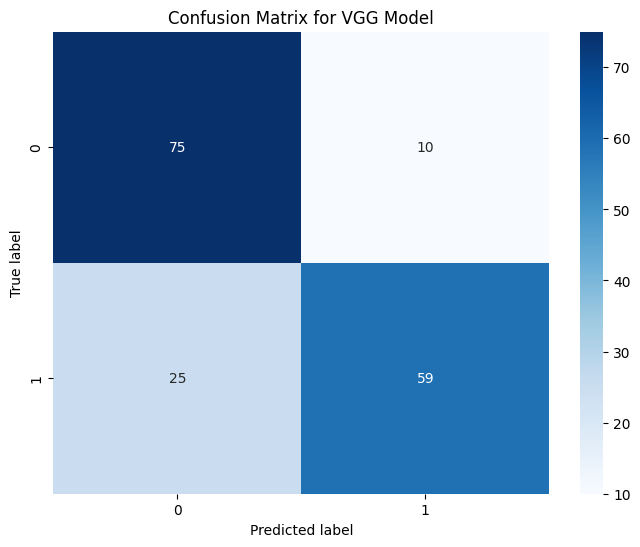

In [313]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for VGG Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [314]:


model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='VGG',
    type='Convolutional',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# ResNet50 Architechture

In [315]:
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters
    X_shortcut = X

    # First component of main path
    X = Conv2D(F1, (1, 1), strides=(1, 1), padding='same', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(F2, (f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(F3, (1, 1), strides=(1, 1), padding='same', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Shortcut path
    X_shortcut = Conv2D(F3, (1, 1), strides=(1, 1), padding='same', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X


def ResNet50(input_shape=(32, 32, 19)):
    # Define the input
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='a')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc' + str(1), kernel_initializer=glorot_uniform(seed=0))(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

model_resnet50 = ResNet50(input_shape=(32, 32, 19))
model_resnet50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_resnet50.summary()


Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 32, 32, 19)]         0         []                            
                                                                                                  
 zero_padding2d_6 (ZeroPadd  (None, 38, 38, 19)           0         ['input_24[0][0]']            
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 16, 16, 64)           59648     ['zero_padding2d_6[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1[0][0]']        

In [316]:
history=model_resnet50.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 6s 167ms/step - loss: 0.6397 - accuracy: 0.7341 - val_loss: 1.0750 - val_accuracy: 0.5357
Epoch 2/20
25/25 [==============================] - 1s 43ms/step - loss: 0.4937 - accuracy: 0.8041 - val_loss: 0.6426 - val_accuracy: 0.7083
Epoch 3/20
25/25 [==============================] - 1s 37ms/step - loss: 0.5004 - accuracy: 0.8015 - val_loss: 0.6556 - val_accuracy: 0.7024
Epoch 4/20
25/25 [==============================] - 1s 36ms/step - loss: 0.4654 - accuracy: 0.7990 - val_loss: 1.0851 - val_accuracy: 0.5119
Epoch 5/20
25/25 [==============================] - 1s 36ms/step - loss: 0.4312 - accuracy: 0.8168 - val_loss: 0.8828 - val_accuracy: 0.6786
Epoch 6/20
25/25 [==============================] - 1s 40ms/step - loss: 0.4232 - accuracy: 0.8244 - val_loss: 0.8407 - val_accuracy: 0.5298
Epoch 7/20
25/25 [==============================] - 1s 36ms/step - loss: 0.4165 - accuracy: 0.8384 - val_loss: 0.7630 - val_accuracy: 0.5476
Epoch 8/20
2

In [317]:

# Evaluate the model on the test data
test_loss, test_acc = model_resnet50.evaluate(X_test, y_test)

# Predict on validation set
y_pred_proba_val = model_resnet50.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model_resnet50.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test=test_acc
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Test accuracy       :', accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)



6/6 [==============================] - 0s 47ms/step
Validation Accuracy : 0.6904761904761905
Validation Precision: 0.7719298245614035
Validation Recall   : 0.5301204819277109
Validation F1 Score : 0.6285714285714286
Validation AUC      : 0.8134656272147412
Test accuracy       : 0.7100591659545898
Test Precision      : 0.8301886792452831
Test Recall         : 0.5238095238095238
Test F1 Score       : 0.6423357664233577
Test AUC            : 0.880532212885154


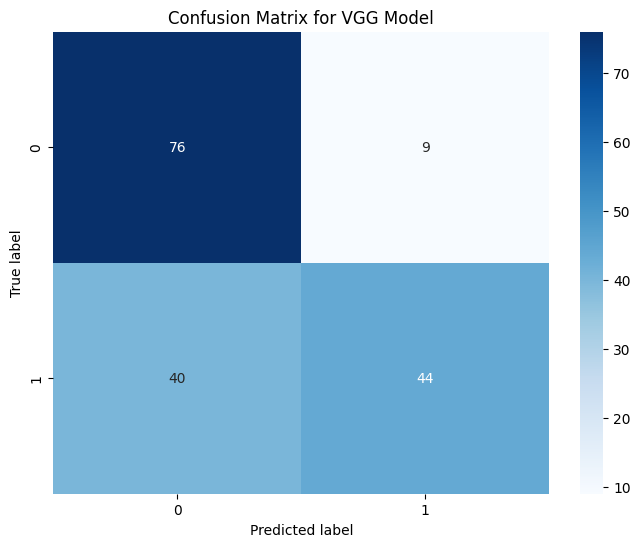

In [318]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for VGG Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [319]:


model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='ResNet50',
    type='Convolutional',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

In [320]:

def simplified_identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters
    X_shortcut = X

    # First component of main path
    X = Conv2D(F1, (1, 1), strides=(1, 1), padding='same', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(F2, (f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Combine with shortcut path
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def SimplifiedResNet(input_shape=(32, 32, 19)):
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(32, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = simplified_identity_block(X, 3, [32, 32, 128], stage=2, block='a')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc' + str(1), kernel_initializer=glorot_uniform(seed=0))(X)

    model = Model(inputs=X_input, outputs=X, name='SimplifiedResNet')

    return model

model_simplified_resnet = SimplifiedResNet(input_shape=(32, 32, 19))
model_simplified_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_simplified_resnet.summary()


Model: "SimplifiedResNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 32, 32, 19)]         0         []                            
                                                                                                  
 zero_padding2d_7 (ZeroPadd  (None, 38, 38, 19)           0         ['input_25[0][0]']            
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 16, 16, 32)           29824     ['zero_padding2d_7[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 16, 16, 32)           128       ['conv1[0][0]']

In [321]:
history=model_simplified_resnet.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 3s 73ms/step - loss: 0.5416 - accuracy: 0.7646 - val_loss: 0.8776 - val_accuracy: 0.7083
Epoch 2/20
25/25 [==============================] - 0s 17ms/step - loss: 0.4723 - accuracy: 0.8117 - val_loss: 0.6376 - val_accuracy: 0.7321
Epoch 3/20
25/25 [==============================] - 0s 15ms/step - loss: 0.4512 - accuracy: 0.8181 - val_loss: 0.7333 - val_accuracy: 0.7202
Epoch 4/20
25/25 [==============================] - 0s 16ms/step - loss: 0.4476 - accuracy: 0.8193 - val_loss: 0.6380 - val_accuracy: 0.7262
Epoch 5/20
25/25 [==============================] - 1s 23ms/step - loss: 0.4428 - accuracy: 0.8206 - val_loss: 0.6350 - val_accuracy: 0.7262
Epoch 6/20
25/25 [==============================] - 0s 15ms/step - loss: 0.4428 - accuracy: 0.8232 - val_loss: 0.7577 - val_accuracy: 0.7321
Epoch 7/20
25/25 [==============================] - 0s 14ms/step - loss: 0.4419 - accuracy: 0.8244 - val_loss: 0.5732 - val_accuracy: 0.7381
Epoch 8/20
25

In [322]:

# Evaluate the model on the test data
test_loss, test_acc = model_simplified_resnet.evaluate(X_test, y_test)

# Predict on validation set
y_pred_proba_val = model_simplified_resnet.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model_simplified_resnet.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test=test_acc
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Test accuracy       :', accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

6/6 [==============================] - 0s 17ms/step
Validation Accuracy : 0.75
Validation Precision: 0.7808219178082192
Validation Recall   : 0.6867469879518072
Validation F1 Score : 0.7307692307692306
Validation AUC      : 0.8423812898653439
Test accuracy       : 0.7869822382926941
Test Precision      : 0.8428571428571429
Test Recall         : 0.7023809523809523
Test F1 Score       : 0.7662337662337663
Test AUC            : 0.8614845938375351


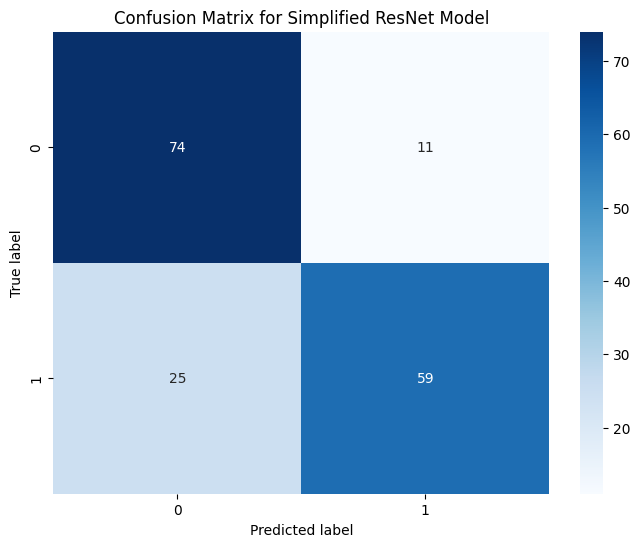

In [323]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Simplified ResNet Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [324]:
model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='ResNet50_Simpl',
    type='Convolutional',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# Inception Inspired Model

In [325]:
def inception_block(X, filters):
    # 1x1 conv
    conv1 = Conv2D(filters=filters, kernel_size=(1, 1), padding='same', activation='relu')(X)

    # 3x3 conv
    conv3 = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', activation='relu')(X)

    # 5x5 conv
    conv5 = Conv2D(filters=filters, kernel_size=(5, 5), padding='same', activation='relu')(X)

    # 3x3 max pooling
    pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(X)

    # concatenate filters, assumes filters/channels last
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)

    return layer_out

def InceptionNet(input_shape):
    X_input = Input(input_shape)
    
    # Inception blocks
    X = inception_block(X_input, 32)
    X = inception_block(X, 64)
    X = MaxPooling2D(pool_size=(4, 4))(X)
    
    # Flatten and fully connected layer
    X = Flatten()(X)
    X = Dense(120, activation='relu')(X)
    X = Dense(84, activation='relu')(X)
    X = Dense(1, activation='sigmoid')(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='InceptionNet')
    
    return model

model_inception = InceptionNet(input_shape=(32, 32, 19))
model_inception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_inception.summary()


Model: "InceptionNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_26 (InputLayer)       [(None, 32, 32, 19)]         0         []                            
                                                                                                  
 conv2d_44 (Conv2D)          (None, 32, 32, 32)           640       ['input_26[0][0]']            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 32, 32, 32)           5504      ['input_26[0][0]']            
                                                                                                  
 conv2d_46 (Conv2D)          (None, 32, 32, 32)           15232     ['input_26[0][0]']            
                                                                                       

In [326]:
history=model_inception.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 5s 130ms/step - loss: 3.5616 - accuracy: 0.6934 - val_loss: 1.8288 - val_accuracy: 0.7202
Epoch 2/20
25/25 [==============================] - 2s 71ms/step - loss: 0.8708 - accuracy: 0.7036 - val_loss: 0.8493 - val_accuracy: 0.7619
Epoch 3/20
25/25 [==============================] - 2s 67ms/step - loss: 0.8636 - accuracy: 0.6298 - val_loss: 1.6180 - val_accuracy: 0.7500
Epoch 4/20
25/25 [==============================] - 2s 63ms/step - loss: 0.7757 - accuracy: 0.7417 - val_loss: 1.0776 - val_accuracy: 0.5893
Epoch 5/20
25/25 [==============================] - 2s 63ms/step - loss: 0.7978 - accuracy: 0.7735 - val_loss: 0.9730 - val_accuracy: 0.5893
Epoch 6/20
25/25 [==============================] - 2s 70ms/step - loss: 1.1305 - accuracy: 0.7061 - val_loss: 0.8782 - val_accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 2s 66ms/step - loss: 0.7692 - accuracy: 0.7201 - val_loss: 1.0745 - val_accuracy: 0.7321
Epoch 8/20
2

In [327]:

# Evaluate the model on the test data
test_loss, test_acc = model_inception.evaluate(X_test, y_test)

# Predict on validation set
y_pred_proba_val = model_inception.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model_inception.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test=test_acc
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Test accuracy       :', accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)



6/6 [==============================] - 0s 43ms/step
Validation Accuracy : 0.5535714285714286
Validation Precision: 0.5256410256410257
Validation Recall   : 0.9879518072289156
Validation F1 Score : 0.6861924686192469
Validation AUC      : 0.7026931254429483
Test accuracy       : 0.5562130212783813
Test Precision      : 0.5283018867924528
Test Recall         : 1.0
Test F1 Score       : 0.6913580246913581
Test AUC            : 0.7412464985994398


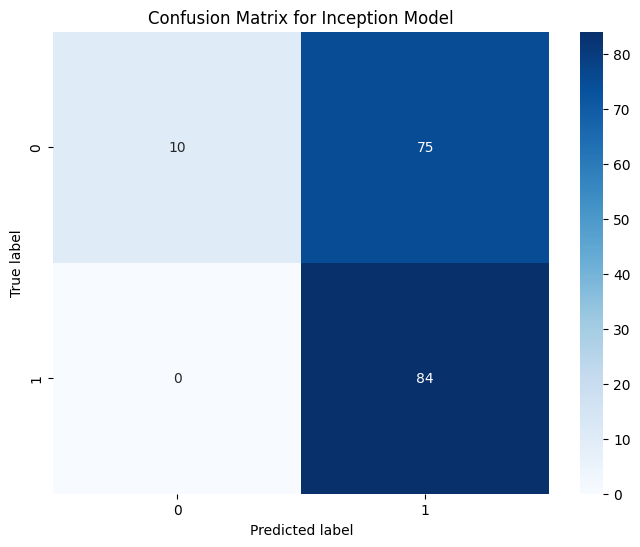

In [328]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Inception Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [329]:


model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Inception',
    type='Convolutional',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

# Alexnet Insipired Model

In [330]:
model_alexnet = Sequential()

# Assuming input_shape is (32, 32, 19) based on your dataset
input_shape = (32, 32, 19)

# Block 1
model_alexnet.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape, padding='same'))
model_alexnet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model_alexnet.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu', padding='same'))
model_alexnet.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3
model_alexnet.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding='same'))
model_alexnet.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding='same'))
model_alexnet.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))

# Classification block
model_alexnet.add(Flatten())
model_alexnet.add(Dense(4096, activation='relu'))
model_alexnet.add(Dropout(0.5))
model_alexnet.add(Dense(4096, activation='relu'))
model_alexnet.add(Dropout(0.5))
model_alexnet.add(Dense(1, activation='sigmoid'))

model_alexnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_alexnet.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 8, 8, 96)          220800    
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 4, 4, 96)          0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 2, 2, 256)         0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_53 (Conv2D)          (None, 2, 2, 384)       

In [331]:
history=model_alexnet.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 4s 96ms/step - loss: 0.9525 - accuracy: 0.6298 - val_loss: 0.6275 - val_accuracy: 0.7440
Epoch 2/20
25/25 [==============================] - 1s 47ms/step - loss: 0.5774 - accuracy: 0.7150 - val_loss: 0.7200 - val_accuracy: 0.7202
Epoch 3/20
25/25 [==============================] - 1s 38ms/step - loss: 0.5908 - accuracy: 0.7646 - val_loss: 0.6978 - val_accuracy: 0.7262
Epoch 4/20
25/25 [==============================] - 1s 39ms/step - loss: 0.5809 - accuracy: 0.7799 - val_loss: 0.7149 - val_accuracy: 0.7321
Epoch 5/20
25/25 [==============================] - 1s 35ms/step - loss: 0.5161 - accuracy: 0.7913 - val_loss: 0.5872 - val_accuracy: 0.7500
Epoch 6/20
25/25 [==============================] - 1s 35ms/step - loss: 0.4774 - accuracy: 0.8193 - val_loss: 0.5931 - val_accuracy: 0.7321
Epoch 7/20
25/25 [==============================] - 1s 35ms/step - loss: 0.4659 - accuracy: 0.8206 - val_loss: 0.5955 - val_accuracy: 0.7560
Epoch 8/20
25

In [332]:

# Evaluate the model on the test data
test_loss, test_acc = model_alexnet.evaluate(X_test, y_test)

# Predict on validation set
y_pred_proba_val = model_alexnet.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model_alexnet.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test=test_acc
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Test accuracy       :', accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)



model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='AlexNet',
    type='Convolutional',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

6/6 [==============================] - 0s 22ms/step
Validation Accuracy : 0.7559523809523809
Validation Precision: 0.7916666666666666
Validation Recall   : 0.6867469879518072
Validation F1 Score : 0.7354838709677419
Validation AUC      : 0.857264351523742
Test accuracy       : 0.7869822382926941
Test Precision      : 0.8428571428571429
Test Recall         : 0.7023809523809523
Test F1 Score       : 0.7662337662337663
Test AUC            : 0.8645658263305322


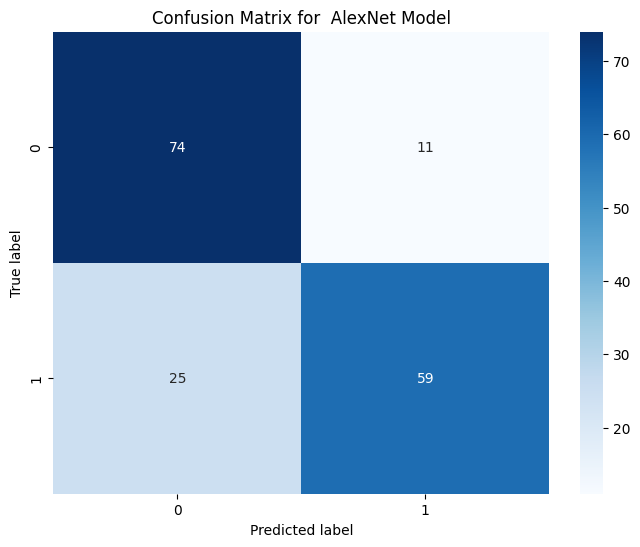

In [333]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for  AlexNet Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Mobilenet Inspired Model

In [334]:
model_mobilenet = Sequential()

# Depthwise Separable Convolution Block 1
model_mobilenet.add(DepthwiseConv2D(kernel_size=(3, 3), input_shape=(32, 32, 19), activation='relu', padding='same'))
model_mobilenet.add(Conv2D(64, (1, 1), activation='relu', padding='same'))
model_mobilenet.add(MaxPooling2D(pool_size=(2, 2)))

# Depthwise Separable Convolution Block 2
model_mobilenet.add(DepthwiseConv2D(kernel_size=(3, 3), activation='relu', padding='same'))
model_mobilenet.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
model_mobilenet.add(MaxPooling2D(pool_size=(2, 2)))

# Depthwise Separable Convolution Block 3
model_mobilenet.add(DepthwiseConv2D(kernel_size=(3, 3), activation='relu', padding='same'))
model_mobilenet.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
model_mobilenet.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the network before the fully connected layers
model_mobilenet.add(Flatten())

# Fully Connected Layers
model_mobilenet.add(Dense(1024, activation='relu'))
model_mobilenet.add(Dropout(0.5))
model_mobilenet.add(Dense(1024, activation='relu'))
model_mobilenet.add(Dropout(0.5))

# Output Layer
model_mobilenet.add(Dense(1, activation='sigmoid'))

# Compile the model
model_mobilenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mobilenet.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d_3 (Depthw  (None, 32, 32, 19)        190       
 iseConv2D)                                                      
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 64)        1280      
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 depthwise_conv2d_4 (Depthw  (None, 16, 16, 64)        640       
 iseConv2D)                                                      
                                                                 
 conv2d_56 (Conv2D)          (None, 16, 16, 128)       8320      
                                                     

In [335]:
history=model_mobilenet.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 4s 101ms/step - loss: 0.6477 - accuracy: 0.6107 - val_loss: 0.6362 - val_accuracy: 0.6845
Epoch 2/20
25/25 [==============================] - 1s 28ms/step - loss: 0.5349 - accuracy: 0.7863 - val_loss: 0.6416 - val_accuracy: 0.7202
Epoch 3/20
25/25 [==============================] - 1s 29ms/step - loss: 0.5092 - accuracy: 0.8066 - val_loss: 0.5941 - val_accuracy: 0.7381
Epoch 4/20
25/25 [==============================] - 1s 21ms/step - loss: 0.4735 - accuracy: 0.8104 - val_loss: 0.6570 - val_accuracy: 0.7262
Epoch 5/20
25/25 [==============================] - 1s 25ms/step - loss: 0.4871 - accuracy: 0.8181 - val_loss: 0.5900 - val_accuracy: 0.7560
Epoch 6/20
25/25 [==============================] - 1s 31ms/step - loss: 0.4841 - accuracy: 0.8219 - val_loss: 0.5778 - val_accuracy: 0.7560
Epoch 7/20
25/25 [==============================] - 1s 26ms/step - loss: 0.4772 - accuracy: 0.8270 - val_loss: 0.6059 - val_accuracy: 0.7560
Epoch 8/20
2

In [336]:

# Evaluate the model on the test data
test_loss, test_acc = model_mobilenet.evaluate(X_test, y_test)

# Predict on validation set
y_pred_proba_val = model_mobilenet.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model_mobilenet.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test=test_acc
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Test accuracy       :', accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)



6/6 [==============================] - 0s 31ms/step
Validation Accuracy : 0.7559523809523809
Validation Precision: 0.7916666666666666
Validation Recall   : 0.6867469879518072
Validation F1 Score : 0.7354838709677419
Validation AUC      : 0.8348688873139618
Test accuracy       : 0.7869822382926941
Test Precision      : 0.8428571428571429
Test Recall         : 0.7023809523809523
Test F1 Score       : 0.7662337662337663
Test AUC            : 0.8788515406162465


In [337]:


model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='MobileNet',
    type='Convolutional',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

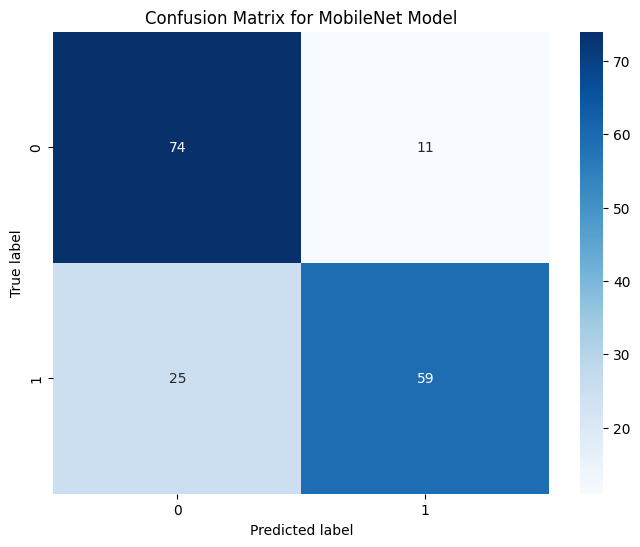

In [338]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MobileNet Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Custom CNN Architecture

In [339]:
custom_cnn_model = Sequential()

# First Convolutional Block with Batch Normalization
custom_cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 19)))
custom_cnn_model.add(BatchNormalization())
custom_cnn_model.add(MaxPooling2D((2, 2)))
custom_cnn_model.add(Dropout(0.2))

# Second Convolutional Block
custom_cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
custom_cnn_model.add(BatchNormalization())
custom_cnn_model.add(MaxPooling2D((2, 2)))
custom_cnn_model.add(Dropout(0.3))

# Third Convolutional Block
custom_cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
custom_cnn_model.add(BatchNormalization())
custom_cnn_model.add(MaxPooling2D((2, 2)))
custom_cnn_model.add(Dropout(0.4))

# Flatten and Dense Layers
custom_cnn_model.add(Flatten())
custom_cnn_model.add(Dense(128, activation='relu'))
custom_cnn_model.add(BatchNormalization())
custom_cnn_model.add(Dropout(0.5))
custom_cnn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

custom_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

custom_cnn_model.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 30, 30, 32)        5504      
                                                                 
 batch_normalization_10 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_59 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_11 (Ba  (None, 13, 13, 64)      

In [340]:
history=custom_cnn_model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 6s 165ms/step - loss: 0.6735 - accuracy: 0.6845 - val_loss: 0.6417 - val_accuracy: 0.6845
Epoch 2/20
25/25 [==============================] - 1s 26ms/step - loss: 0.5754 - accuracy: 0.7468 - val_loss: 0.6170 - val_accuracy: 0.6905
Epoch 3/20
25/25 [==============================] - 1s 22ms/step - loss: 0.5281 - accuracy: 0.7634 - val_loss: 0.6090 - val_accuracy: 0.7143
Epoch 4/20
25/25 [==============================] - 0s 20ms/step - loss: 0.5140 - accuracy: 0.7799 - val_loss: 0.5980 - val_accuracy: 0.7083
Epoch 5/20
25/25 [==============================] - 0s 19ms/step - loss: 0.4883 - accuracy: 0.7939 - val_loss: 0.6352 - val_accuracy: 0.5595
Epoch 6/20
25/25 [==============================] - 0s 20ms/step - loss: 0.4817 - accuracy: 0.7901 - val_loss: 0.6403 - val_accuracy: 0.5655
Epoch 7/20
25/25 [==============================] - 1s 23ms/step - loss: 0.4744 - accuracy: 0.8015 - val_loss: 0.6193 - val_accuracy: 0.5714
Epoch 8/20
2

In [341]:

# Evaluate the model on the test data
test_loss, test_acc = custom_cnn_model.evaluate(X_test, y_test)

# Predict on validation set
y_pred_proba_val = custom_cnn_model.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = custom_cnn_model.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test=test_acc
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Test accuracy       :', accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)



model_metrics = append_model_metrics(
    metrics_df=model_metrics,
    name='Custom CNN',
    type='Convolutional',
    epoch=20,
    batch_size=32,
    accuracy_val=accuracy_val,
    precision_val=precision_val,
    recall_val=recall_val,
    f1score_val=f1score_val,
    auc_val=auc_val,
    accuracy_test=accuracy_test,
    precision_test=precision_test,
    recall_test=recall_test,
    f1score_test=f1score_test,
    auc_test=auc_test
)

6/6 [==============================] - 0s 19ms/step
Validation Accuracy : 0.5535714285714286
Validation Precision: 0.5253164556962026
Validation Recall   : 1.0
Validation F1 Score : 0.6887966804979253
Validation AUC      : 0.578880226789511
Test accuracy       : 0.5088757276535034
Test Precision      : 0.503030303030303
Test Recall         : 0.9880952380952381
Test F1 Score       : 0.6666666666666667
Test AUC            : 0.5854341736694677


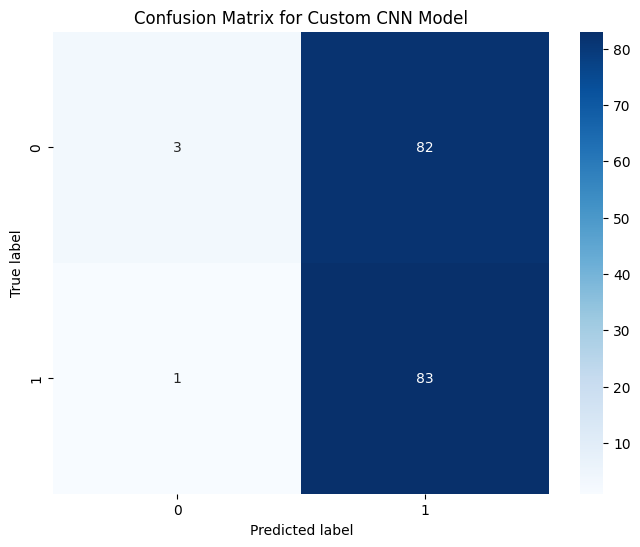

In [342]:
# Compute confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Custom CNN Model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Ensemble Predictions

In [343]:
model_metrics[model_metrics['Model Name'].isin(['ResNet50', 'Inception', 'Custom CNN', 'MobileNet'])]

,Model Name,Type,Epoch,Batch Size,Validation Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Validation AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC
13,ResNet50,Convolutional,20,32,0.690476,0.771930,0.530120,0.628571,0.813466,0.710059,0.830189,0.523810,0.642336,0.880532
15,Inception,Convolutional,20,32,0.553571,0.525641,0.987952,0.686192,0.702693,0.556213,0.528302,1.000000,0.691358,0.741246
17,MobileNet,Convolutional,20,32,0.755952,0.791667,0.686747,0.735484,0.834869,0.786982,0.842857,0.702381,0.766234,0.878852
18,Custom CNN,Convolutional,20,32,0.553571,0.525316,1.000000,0.688797,0.578880,0.508876,0.503030,0.988095,0.666667,0.585434


In [344]:
def weighted_ensemble_predictions(models, weights, X):
    weighted_predictions = np.zeros((X.shape[0], 1))  # Initialize an array to store weighted predictions

    for model, weight in zip(models, weights):
        predictions = model.predict(X)
        weighted_predictions += weight * predictions

    # Normalize by sum of weights
    weighted_predictions /= sum(weights)
    return weighted_predictions

# Assigning weights based on test accuracies
weights = [0.926686, 0.910278, 0.879346]  # Replace with actual test accuracies of ResNet50, Inception, Custom CNN

# Models list
models = [model_resnet50, model_inception, custom_cnn_model]

# Making weighted ensemble predictions
weighted_ensemble_preds = weighted_ensemble_predictions(models, weights, X_test)

# Convert weighted probabilities to binary predictions
weighted_ensemble_binary_preds = (weighted_ensemble_preds >= 0.5).astype(int)

6/6 [==============================] - 0s 3ms/step


In [345]:
# Evaluation on Test Set for Weighted Ensemble
accuracy_test = accuracy_score(y_test, weighted_ensemble_binary_preds)
precision_test = precision_score(y_test, weighted_ensemble_binary_preds)
recall_test = recall_score(y_test, weighted_ensemble_binary_preds)
f1score_test = f1_score(y_test, weighted_ensemble_binary_preds)
auc_test = roc_auc_score(y_test, weighted_ensemble_preds)  # Use probabilities, not binary predictions

print('Weighted Ensemble Test Accuracy :', accuracy_test)
print('Weighted Ensemble Test Precision:', precision_test)
print('Weighted Ensemble Test Recall   :', recall_test)
print('Weighted Ensemble Test F1 Score :', f1score_test)
print('Weighted Ensemble Test AUC      :', auc_test)


Weighted Ensemble Test Accuracy : 0.5621301775147929
Weighted Ensemble Test Precision: 0.532051282051282
Weighted Ensemble Test Recall   : 0.9880952380952381
Weighted Ensemble Test F1 Score : 0.6916666666666668
Weighted Ensemble Test AUC      : 0.8733893557422969


In [346]:
model_metrics.style.apply(lambda s: ['background-color: green' if (s.name == 'Validation F1 Score' and v > 0.8) or 
                                                 (s.name == 'Test F1 Score' and v > 0.8) else 'background-color: brown' for v in s], 
                                                 subset=['Validation F1 Score', 'Test F1 Score'])

# model_metrics.style.apply(lambda s: ['background-color: green' if (s.name == 'Validation AUC' and v > 0.9) or 
#                                                  (s.name == 'Test AUC' and v > 0.9) else 'background-color: brown' for v in s], 
#                                                  subset=['Validation AUC', 'Test AUC'])

# model_metrics.style.apply(lambda s: ['background-color: red' if v < 0.5 else 
#                                                  'background-color: blue' if 0.5 <= v <= 0.8 else 
#                                                  'background-color: green' if v > 0.8 else '' 
#                                                  for v in s], subset=['Test Accuracy'])


,Model Name,Type,Epoch,Batch Size,Validation Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Validation AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC
0,Stacked Classifier,Traditional,-,-,0.932584,0.927711,0.927711,0.927711,0.973494,0.977528,0.966667,0.988636,0.977528,0.986995
1,Gradient Boosting,Traditional,-,-,0.904494,0.912500,0.879518,0.895706,0.951427,0.921348,0.911111,0.931818,0.921348,0.976831
2,XGBoost,Traditional,-,-,0.932584,0.949367,0.903614,0.925926,0.987254,0.977528,0.966667,0.988636,0.977528,0.995328
3,Random Forest,Traditional,-,-,0.955056,0.962963,0.939759,0.951220,0.987825,0.966292,0.965909,0.965909,0.965909,0.995770
4,Neural Network,Deep Learning,20,32,0.904494,0.858696,0.951807,0.902857,0.942930,0.955056,0.925532,0.988636,0.956044,0.961995
5,Multi Layer Perceptron,Deep Learning,20,32,0.938202,0.918605,0.951807,0.934911,0.973621,0.977528,0.966667,0.988636,0.977528,0.983081
6,Autoencoder,Deep Learning,20,32,0.780899,0.879310,0.614458,0.723404,0.901332,0.814607,0.910448,0.693182,0.787097,0.939141
7,Autoencoder 2,Deep Learning,20,32,0.893258,0.840426,0.951807,0.892655,0.945466,0.932584,0.887755,0.988636,0.935484,0.968561
8,Deep Belief Network,Deep Learning,20,32,0.808989,0.720721,0.963855,0.824742,0.934686,0.865169,0.790909,0.988636,0.878788,0.950126
9,Gated Recurrent Network,Deep Learning,20,32,0.910112,0.868132,0.951807,0.908046,0.960431,0.949438,0.924731,0.977273,0.950276,0.971970


In [347]:
model_metrics[model_metrics['Model Name']=='Multi Layer Perceptron']

,Model Name,Type,Epoch,Batch Size,Validation Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Validation AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test AUC
5,Multi Layer Perceptron,Deep Learning,20,32,0.938202,0.918605,0.951807,0.934911,0.973621,0.977528,0.966667,0.988636,0.977528,0.983081


In [348]:
end_time = time.time()
execution_time = end_time - start_time

print("Execution time for the model iteration: {:.2f} seconds".format(execution_time))

Execution time for the model iteration: 241.25 seconds


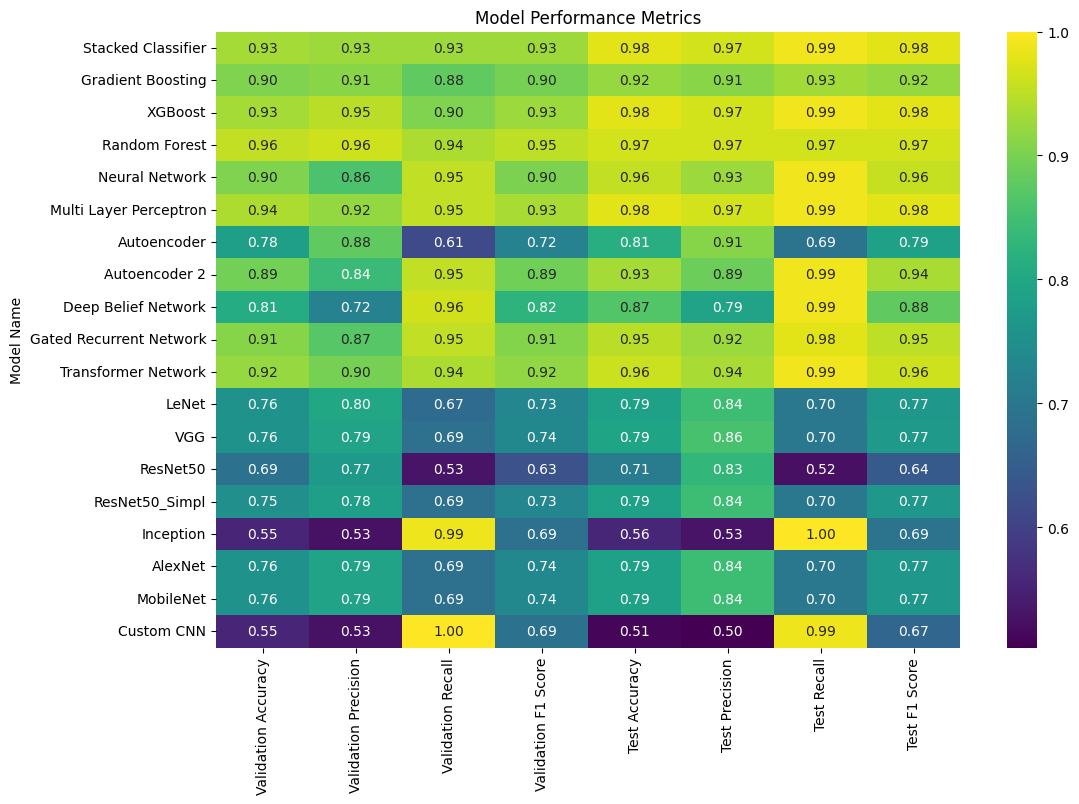

In [349]:
plt.figure(figsize=(12, 8))
sns.heatmap(model_metrics.set_index('Model Name').drop(['Test AUC', 'Validation AUC','Type','Epoch','Batch Size'], axis=1),
            annot=True, cmap='viridis', fmt=".2f")
plt.title('Model Performance Metrics')
plt.show()

# `Functional CNN Modeling`

In [350]:
# Split data into training and other sets first
X = np.vstack((x1, x2))
y = np.concatenate((y1, y2))

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the training set. Fit the scaler on X_train only
scaler = MinMaxScaler()
X_train_reshaped = X_train.reshape(-1, 19)  # Reshape to 2D array for scaling
scaler.fit(X_train_reshaped)  # Fit on the training data only

# Transform the training data
X_train_scaled = scaler.transform(X_train_reshaped)
X_train_scaled = X_train_scaled.reshape(X_train.shape)

# Transform the validation and test sets based on the scaler fitted on the training data
X_val_reshaped = X_val.reshape(-1, 19)
X_val_scaled = scaler.transform(X_val_reshaped)
X_val_scaled = X_val_scaled.reshape(X_val.shape)

X_test_reshaped = X_test.reshape(-1, 19)
X_test_scaled = scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

# Resize the images after scaling, if needed
X_train_resized = resize(X_train_scaled, (X_train_scaled.shape[0], 32, 32, 19))
X_val_resized = resize(X_val_scaled, (X_val_scaled.shape[0], 32, 32, 19))
X_test_resized = resize(X_test_scaled, (X_test_scaled.shape[0], 32, 32, 19))

# Your final variables for model training and evaluation
print(X_train_resized.shape, X_val_resized.shape, X_test_resized.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(786, 32, 32, 19) (168, 32, 32, 19) (169, 32, 32, 19)
(786,) (168,) (169,)


In [351]:
X_train = X_train_resized
X_val = X_val_resized
X_test = X_test_resized

# ResNet50

In [352]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam

In [353]:

# Load pre-trained ResNet50 model without the top layer
input_tensor = Input(shape=(32, 32, 19))
base_model = ResNet50(weights=None, include_top=False, input_tensor=input_tensor)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for your specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Adjust based on your problem

model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 32, 32, 19)]         0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 19)           0         ['input_27[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           59648     ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [354]:
# Train the model on your data
history=model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20


2024-01-27 23:15:42.064499: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


25/25 [==============================] - 11s 328ms/step - loss: 0.6635 - accuracy: 0.6412 - val_loss: 0.6708 - val_accuracy: 0.6667
Epoch 2/20
25/25 [==============================] - 2s 66ms/step - loss: 0.6555 - accuracy: 0.6959 - val_loss: 0.6659 - val_accuracy: 0.6786
Epoch 3/20
25/25 [==============================] - 1s 54ms/step - loss: 0.6449 - accuracy: 0.7036 - val_loss: 0.6645 - val_accuracy: 0.6964
Epoch 4/20
25/25 [==============================] - 1s 43ms/step - loss: 0.6454 - accuracy: 0.7112 - val_loss: 0.6605 - val_accuracy: 0.6667
Epoch 5/20
25/25 [==============================] - 1s 44ms/step - loss: 0.6363 - accuracy: 0.7316 - val_loss: 0.6586 - val_accuracy: 0.6786
Epoch 6/20
25/25 [==============================] - 1s 42ms/step - loss: 0.6250 - accuracy: 0.7379 - val_loss: 0.6552 - val_accuracy: 0.6845
Epoch 7/20
25/25 [==============================] - 1s 51ms/step - loss: 0.6183 - accuracy: 0.7430 - val_loss: 0.6534 - val_accuracy: 0.6905
Epoch 8/20
25/25 [====

In [355]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predict on validation set
y_pred_proba_val = model.predict(X_val)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Predict on test set
y_pred_proba_test = model.predict(X_test)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation on Validation Set
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1score_val = f1_score(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_proba_val)
accuracy_val = accuracy_score(y_val, y_pred_val)

print("Validation Accuracy :", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall   :", recall_val)
print("Validation F1 Score :", f1score_val)
print("Validation AUC      :", auc_val)

# Evaluation on Test Set
accuracy_test=test_acc
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1score_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Test accuracy       :', accuracy_test)
print("Test Precision      :", precision_test)
print("Test Recall         :", recall_test)
print("Test F1 Score       :", f1score_test)
print("Test AUC            :", auc_test)

6/6 [==============================] - 2s 332ms/step
Validation Accuracy : 0.6845238095238095
Validation Precision: 0.7419354838709677
Validation Recall   : 0.5542168674698795
Validation F1 Score : 0.6344827586206897
Validation AUC      : 0.7722182849043231
Test accuracy       : 0.7278106212615967
Test Precision      : 0.8166666666666667
Test Recall         : 0.5833333333333334
Test F1 Score       : 0.6805555555555557
Test AUC            : 0.849719887955182
